
#**(Overview of Project)**

The Dataset is about Air Passenger Satisfaction which contains the data sourced from a survey conducted by airlines on the satisfaction level of passengers/customers based on various factors. The dataset consists of 25 columns such as Age, Gender, Travel class, Arrival and Departure delays and also features that influences customer satisfaction level such as On-board service, Cleanliness, Seat comfort, Baggage handling etc.
The dataset consists of a column or feature named ‘satisfaction’ which describes the overall satisfaction level of the customer. It has two values, ‘neutral or dissatisfied’ and ‘satisfied’. This satisfaction feature is considered as the label feature since it conveys the overall experience of the customer based on the ratings given for other features. The dataset consists of 103904 records.

##**Problem Statement** :
The Growth of the Airline industry provides opportunities as well as challenges to the business entities in this industry. While the challenges arise not only because of the competition between the Airline Companies, but also due to growing consumer demands for better service. These conditions cause Airline industry require continuously innovate in terms of both services and technology used to deliver services and better safety to the consumers. so it is necessary for Company to understand which Parameters play an Crucial role in influencing a passenger feedback.


##**Purpose** :
The Purpose of this project is to determine the relative importance of each parameter with regards to their contribution to passenger satisfaction. as the passengers were asked to provide their feedback at the end of their flights on various parameters along with their overall experience. 



## **Objective :**
1.To understand which Features play an important role in turning a passenger feedback towards ‘satisfied’.

2.To predict whether a passenger will be satisfied or not given the rest of the details are provided.


## **Attribute Information :**
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal 
customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time
convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

#**1.Read Dataset**

In [ ]:
!pip install eli5
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c629d2bc887bec80c59342dc4be0cd3ccf2540c82ccc6f4bb13fb7453217a821
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import warnings
import copy
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline



from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inteliment/Air Passenger Satisfaction Project/data.csv')
dataset = copy.deepcopy(air)

In [ ]:
air.columns = [c.replace(' ', '_') for c in air.columns]

In [91]:
air.head()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df = air.drop(columns=['Unnamed:_0','id'],axis = 1)
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.shape

(103904, 23)

#**2.Imputing Missing Values**

##**Count Missing**

In [ ]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:

num_col = ['Age','Flight_Distance','Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
        'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

cat_col = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


###**There are missing values present in one column named 'Arrival delay in minutes'**

###**so 0.29 % are missing values present so we check mean, median to replace the missing value**

##**Normality**

In [ ]:
# sns.pairplot(df)
# plt.plot()


In [ ]:
num_col

['Age',
 'Flight_Distance',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness']

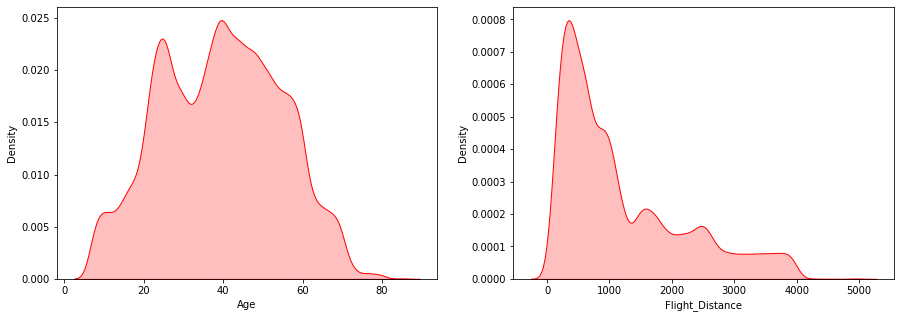

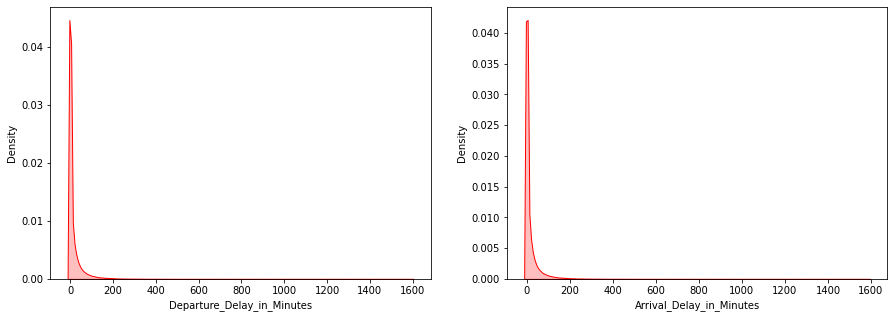

In [ ]:
color_code = sns.color_palette("rocket", as_cmap=True)
c_color = 'rocket'
# checking distributions
i = 0
while i < 4:
    plt.figure(figsize = [15,5])
    plt.subplot(1,2,1)
    sns.kdeplot(x = num_col[i], data = df,color = 'red', fill = True)
    i+=1
    
    plt.subplot(1,2,2)
    sns.kdeplot(x = num_col[i], data = df, color = 'red',fill = True)
    i+=1
    
    # plt.subplot(1,3,3)
    # sns.kdeplot(x = num_col[i], data = df, palette='pastel', fill = True)
    # i+=1

    
    plt.show()


**Non Normal Data**

In [ ]:
# Checking mean , median and mode
mean = df.Arrival_Delay_in_Minutes.mean()
median = df.Arrival_Delay_in_Minutes.median()
mode = df.Arrival_Delay_in_Minutes.mode()[0]

print(f"Mean : {mean}\nMedian : {median}\nMode : {mode}")

Mean : 15.178678301832152
Median : 0.0
Mode : 0.0


###**We Replace with Median**

In [ ]:
df['Arrival_Delay_in_Minutes'].fillna(value = median, inplace = True)

In [ ]:
df.isna().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

###**we have memory usage of 18.2 MB so to reduce memory usage we convert int64 to int16**

#### Creating temporary Backup dataset for extra calculations ( test )

In [ ]:
import copy as cp
test = cp.deepcopy(df)

In [ ]:
print(f"Categorical Columns : {cat_col}\n\nNUmerical Columns : {num_col}")

Categorical Columns : ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

NUmerical Columns : ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']


In [ ]:
df.describe(include = 'all')

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [ ]:
for i in num_col:
    df[i]=df[i].apply(np.int16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer_Type                      103904 non-null  object
 2   Age                                103904 non-null  int16 
 3   Type_of_Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight_Distance                    103904 non-null  int16 
 6   Inflight_wifi_service              103904 non-null  int16 
 7   Departure/Arrival_time_convenient  103904 non-null  int16 
 8   Ease_of_Online_booking             103904 non-null  int16 
 9   Gate_location                      103904 non-null  int16 
 10  Food_and_drink                     103904 non-null  int16 
 11  Online_boarding                    103904 non-null  

###**after conversion we got usage of 7.5 MB**

#**3.Handling Outliers**

### **IQR Method**

In [ ]:
new_color = sns.color_palette("rocket")

In [ ]:
cat_col

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

In [ ]:
num_col

['Age',
 'Flight_Distance',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness']

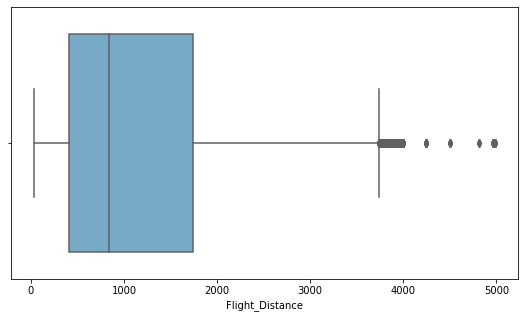

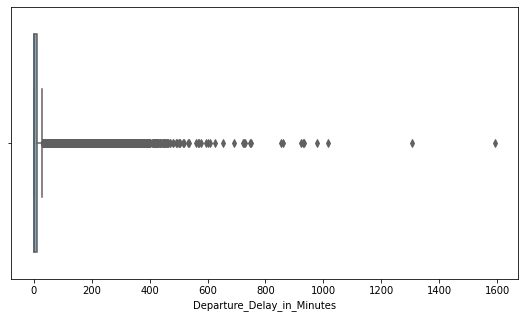

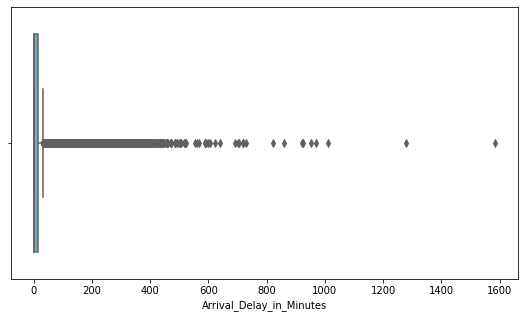

In [ ]:

outlier =  ['Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']
for i in outlier:
    plt.figure(figsize =([20,5]))
    plt.subplot(1,2,1)
    plt.xlabel(i)
    sns.boxplot(x = i, data = df, palette='Blues')
    plt.show()

In [ ]:
for i in num_col:
    Q3, Q1 = np.percentile(df[i], [75,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=df[i][df[i]>high]
    y=df[i][df[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers')

Age has ===>   0 outliers
Flight_Distance has ===>   2291 outliers
Departure_Delay_in_Minutes has ===>   14529 outliers
Arrival_Delay_in_Minutes has ===>   13954 outliers
Inflight_wifi_service has ===>   0 outliers
Departure/Arrival_time_convenient has ===>   0 outliers
Ease_of_Online_booking has ===>   0 outliers
Gate_location has ===>   0 outliers
Food_and_drink has ===>   0 outliers
Online_boarding has ===>   0 outliers
Seat_comfort has ===>   0 outliers
Inflight_entertainment has ===>   0 outliers
On-board_service has ===>   0 outliers
Leg_room_service has ===>   0 outliers
Baggage_handling has ===>   0 outliers
Checkin_service has ===>   12891 outliers
Inflight_service has ===>   0 outliers
Cleanliness has ===>   0 outliers


###**Replace with Higher and Lower Values**

In [ ]:
p0_ = []
p100_ = []
iqr_ = []
high_ = []
low_ = []
outlier = ['Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']
for i in outlier:
    p0 : int =df[i].min()
    p100: int =df[i].max()
    
    p0_.append(p0)
    p100_.append(p100)

    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.5)
    q3=df[i].quantile(0.75)
    
    iqr=q3-q1
    iqr_.append(iqr)
    
    low: int = q1 - (1.5 * iqr)
    high: int = q3 + (1.5 * iqr)
    
    low_.append(low)
    high_.append(high)


In [ ]:
print(f"Values of {[i for i in outlier]}\n\n\tMINIMUM AND MAXIMUM \n\nMinimum values list {p0_} \n\nMaximum values are {p100_}  \n\n\tAFTER IQR\n\nLow values are {low_} \n\nHigh values are {high_}")

Values of ['Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

	MINIMUM AND MAXIMUM 

Minimum values list [31, 0, 0] 

Maximum values are [4983, 1592, 1584]  

	AFTER IQR

Low values are [-1579.5, -18.0, -19.5] 

High values are [3736.5, 30.0, 32.5]


In [ ]:
df.Flight_Distance = df.Flight_Distance.clip(upper = high_[0])
df.Departure_Delay_in_Minutes = df.Departure_Delay_in_Minutes.clip(upper = high_[1])
df.Arrival_Delay_in_Minutes = df.Arrival_Delay_in_Minutes.clip(upper = high_[2])

In [ ]:
import copy
df1 = copy.deepcopy(df) 

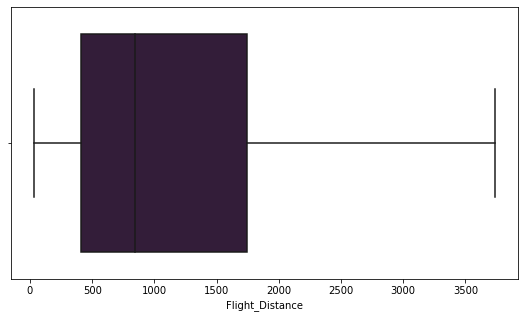

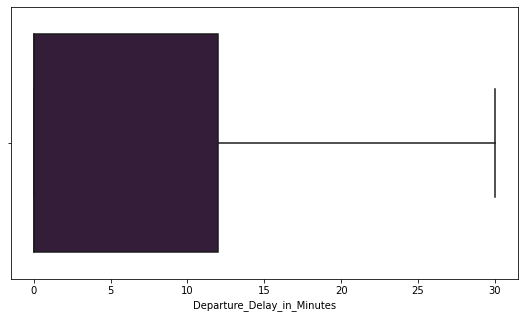

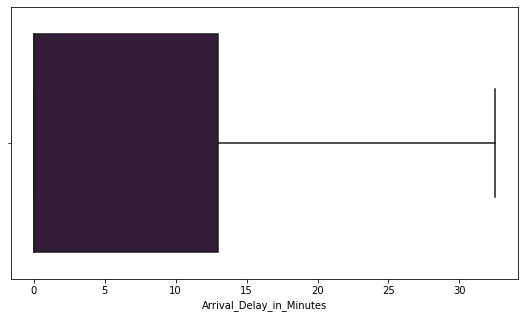

In [ ]:
outlier =  ['Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']
for i in outlier:
    plt.figure(figsize =([20,5]))
    plt.subplot(1,2,1)
    plt.xlabel(i)
    sns.boxplot(x = i, data = df, palette=new_color)
    plt.show()

In [ ]:
for i in num_col:
    df[i]=df[i].apply(np.int16)

## Create copy of data

In [ ]:
import copy
df5 = copy.deepcopy(df)

#**4.Feature Selection (Correlation Matrix and ChiSquare)**

## **1.Correlation Matrix**

In [ ]:
cor = df1.corr()
cor

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,1.000000,0.099611,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.008702,-0.011810
Flight_Distance,0.099611,1.000000,0.007183,-0.019982,0.066008,0.004704,0.057256,0.215491,0.157867,0.129054,0.109953,0.134137,0.063288,0.073398,0.057852,0.093451,0.001720,-0.006830
Inflight_wifi_service,0.017859,0.007183,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.027403,-0.032091
Departure/Arrival_time_convenient,0.038125,-0.019982,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.001224,-0.003149
Ease_of_Online_booking,0.024842,0.066008,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.007960,-0.010769
Gate_location,-0.001330,0.004704,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.003901,0.004946
Food_and_drink,0.023000,0.057256,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.025332,-0.034585
Online_boarding,0.208939,0.215491,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.031291,-0.043304
Seat_comfort,0.160277,0.157867,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.026471,-0.036338
Inflight_entertainment,0.076444,0.129054,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.031136,-0.041972


In [ ]:
test = df1
x = test.iloc[:,:-2]
y = test.iloc[:,-2]
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied' : 1},inplace = True)

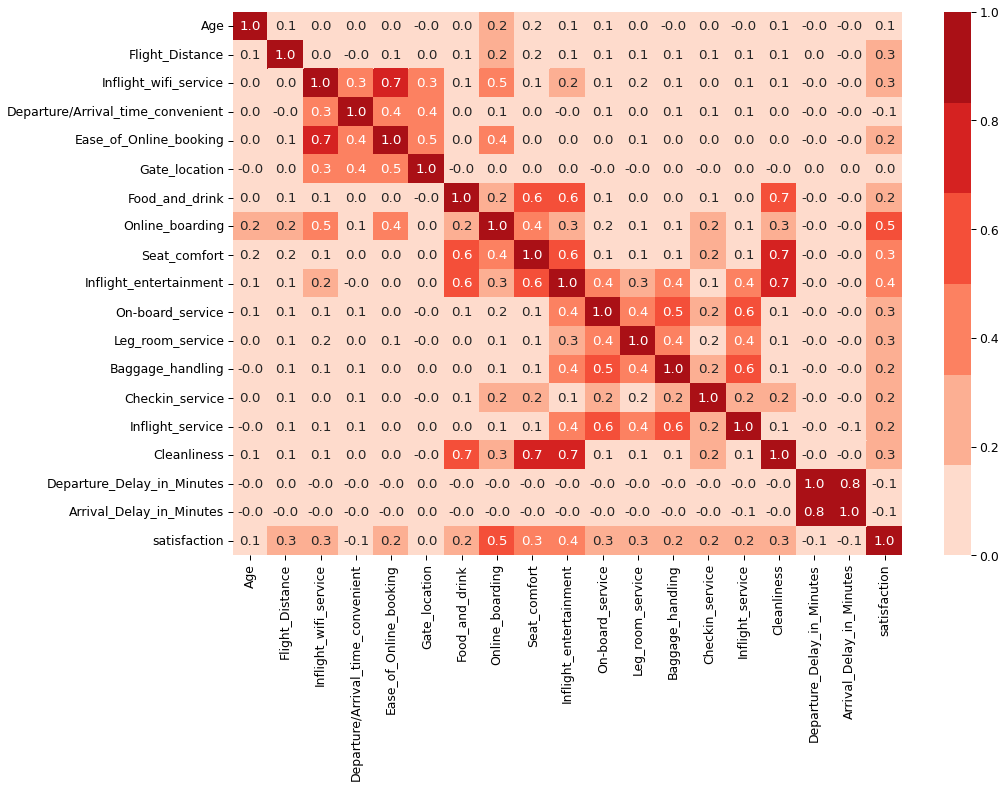

In [ ]:
cor = test.corr()
plt.figure(figsize=(15,10))
sns.set_context('paper',font_scale = 1.4)
color_map = sns.color_palette('Reds')
sns.heatmap(cor, annot=True,cmap=color_map,fmt='1.1f',vmin=0, vmax=1)
plt.show()


####**"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity.**

####**Columns like Departure/Arrival_time_convenient, Gate_Location, Departure and Arrival time are not correlated with satisfaction so we drop it**

In [ ]:
df1.drop(columns = {'Departure/Arrival_time_convenient','Gate_location','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes'},inplace = True)

In [ ]:
df1.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,3,5,3,5,5,4,3,4,4,5,5,0
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,3,1,3,1,1,1,5,3,1,4,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,5,5,5,5,4,3,4,4,4,5,1
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,2,2,2,2,2,5,3,1,4,2,0
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,4,5,5,3,3,4,4,3,3,3,1


##**2.Selection of Features using ChiSquare**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler

In [ ]:
df1.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,3,5,3,5,5,4,3,4,4,5,5,0
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,3,1,3,1,1,1,5,3,1,4,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,5,5,5,5,4,3,4,4,4,5,1
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,2,2,2,2,2,5,3,1,4,2,0
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,4,5,5,3,3,4,4,3,3,3,1


In [ ]:
df1 = pd.get_dummies(df1, columns=['Gender', 'Customer_Type','Type_of_Travel','Class'])

In [ ]:
df1.head()

,Age,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460.0,3,3,5,3,5,5,4,3,4,4,5,5,0,0,1,1,0,0,1,0,0,1
1,25,235.0,3,3,1,3,1,1,1,5,3,1,4,1,0,0,1,0,1,1,0,1,0,0
2,26,1142.0,2,2,5,5,5,5,4,3,4,4,4,5,1,1,0,1,0,1,0,1,0,0
3,25,562.0,2,5,2,2,2,2,2,5,3,1,4,2,0,1,0,1,0,1,0,1,0,0
4,61,214.0,3,3,4,5,5,3,3,4,4,3,3,3,1,0,1,1,0,1,0,1,0,0


In [ ]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df1)
modified_data = pd.DataFrame(r_scaler.transform(df1), columns=df1.columns)
modified_data.head()

,Age,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.076923,0.115774,0.6,0.6,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.230769,0.055053,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.243590,0.299825,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.230769,0.143300,0.4,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.692308,0.049386,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=20)
selector.fit(X, y)
X_new = selector.transform(X)
imp_feature = print(X.columns[selector.get_support(indices=True)])

Index(['Flight_Distance', 'Inflight_wifi_service', 'Ease_of_Online_booking',
       'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Customer_Type_Loyal Customer',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Business travel',
       'Type_of_Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')


#**5.Exploratory Data Analysis**

##**5.1 Start**

In [ ]:
len(df5.columns)

23

In [ ]:
# df5.drop(['Gate_location','Arrival_Delay_in_Minutes','Departure/Arrival_time_convenient'],axis=1,inplace=True)
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inteliment/Air Passenger Satisfaction Project/data.csv')

In [ ]:
features = ['Customer_Type_Loyal Customer','Type_of_Travel_Personal Travel','Type_of_Travel_Business travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Class','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Checkin_service', 
            'Inflight_service', 'Baggage_handling','Class_Business']
target = ['satisfaction']

In [ ]:
len(features)

15

In [ ]:
new_color = sns.color_palette('pastel')

In [ ]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
pd.DataFrame({'Numerical Column' : num_col})

,Numerical Column
0,Age
1,Flight_Distance
2,Departure_Delay_in_Minutes
3,Arrival_Delay_in_Minutes
4,Inflight_wifi_service
5,Departure/Arrival_time_convenient
6,Ease_of_Online_booking
7,Gate_location
8,Food_and_drink
9,Online_boarding


In [ ]:
len(num_col)

18

In [ ]:
len(cat_col)

4

##**5.2 Set Color Palette**

In [ ]:
two_colors = ['#8b324d','#387149']
new_color = sns.color_palette('Reds_r')
# new_color = sns.color_palette('Blues_r')
# new_color = sns.color_palette('Purples_r')

#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap'
#, 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
#'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
#'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
#'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', '
#RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
#'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
# 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
# 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'


##**5.3 Target Feature ( Satisfaction )**

In [ ]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied


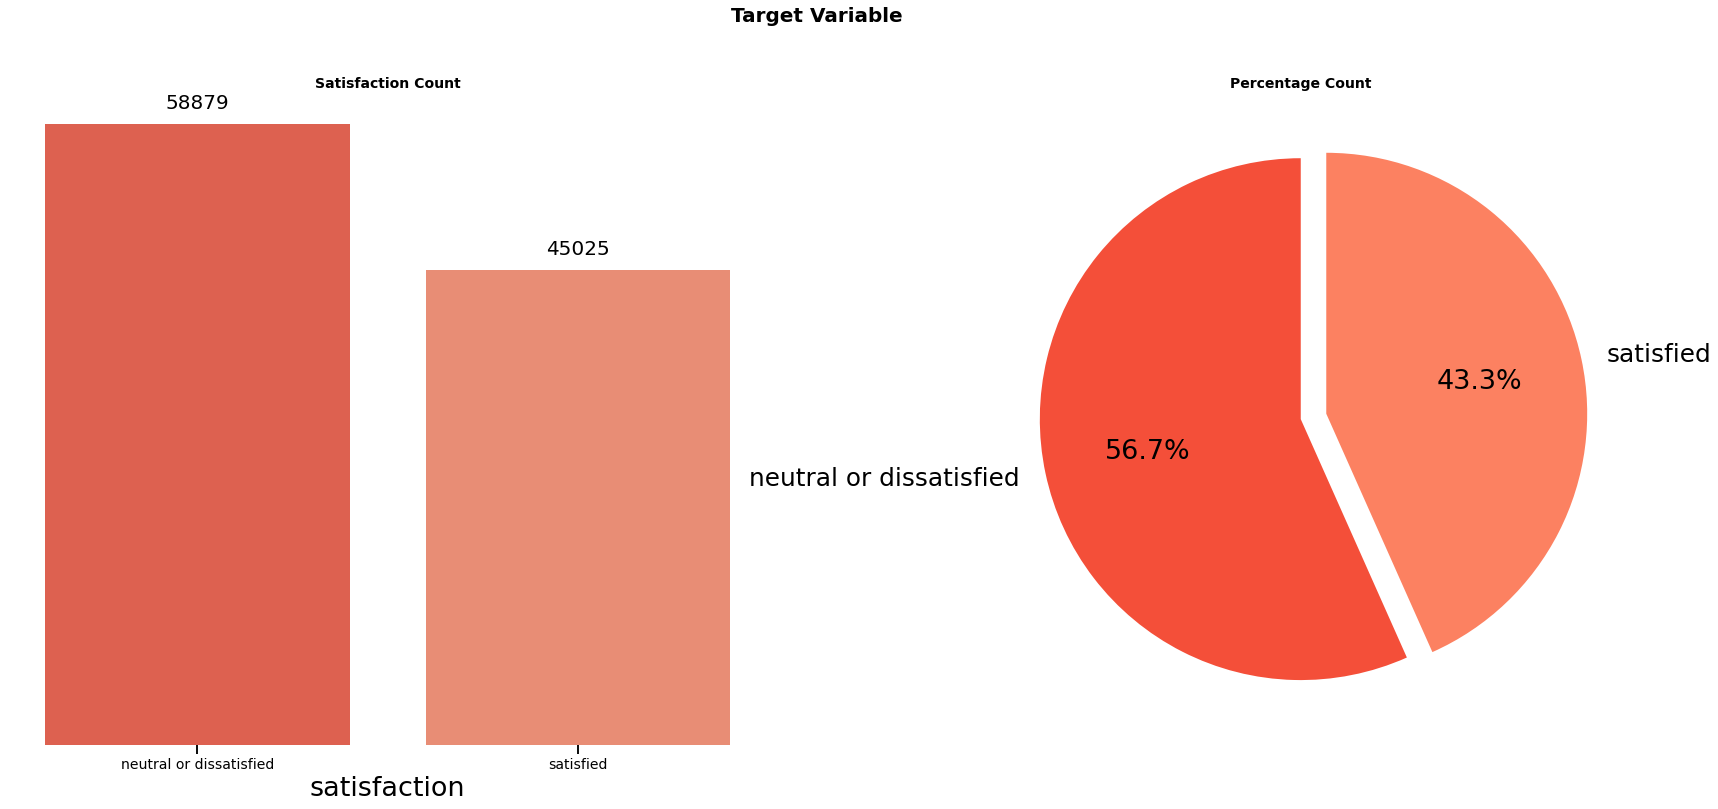

In [ ]:

sns.set_context('talk',font_scale = 1.5)

fig = plt.figure(figsize = (30,12))
plt.suptitle("Target Variable", weight = 'bold', fontsize = 20)
grid = gridspec.GridSpec(nrows=1,ncols=2, figure = fig)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count',weight = 'bold', fontsize = 14)
sns.countplot(x = 'satisfaction',data = df, ax = ax1, palette= new_color[2:])

for spine in ax1.spines.values():
    spine.set_visible(False)
    
ax1.get_yaxis().set_visible(False)
ax1.set_xticklabels(df['satisfaction'].value_counts().index,fontsize = 14)
for index,value in enumerate(df['satisfaction'].value_counts()):
    ax1.annotate(value, xy = (index, value + 2000), ha = 'center', va = 'center', fontsize = 20)
    
    
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Percentage Count',weight = 'bold', fontsize = 14)
label = list(df['satisfaction'].value_counts().index)
value = list(df['satisfaction'].value_counts().values)
ax2.pie(value,labels = label,autopct = "%1.1f%%", explode = (0,0.1),startangle=90, colors = new_color[2:])
ax2.axis = 'equal'
plt.show()



###**We have Count of (58879) 56.7% Satisfied People and count of (45025) 43.3 % are Neutral or Unsatisfied People.**

##**5.4 Customer Profile**

In [ ]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied


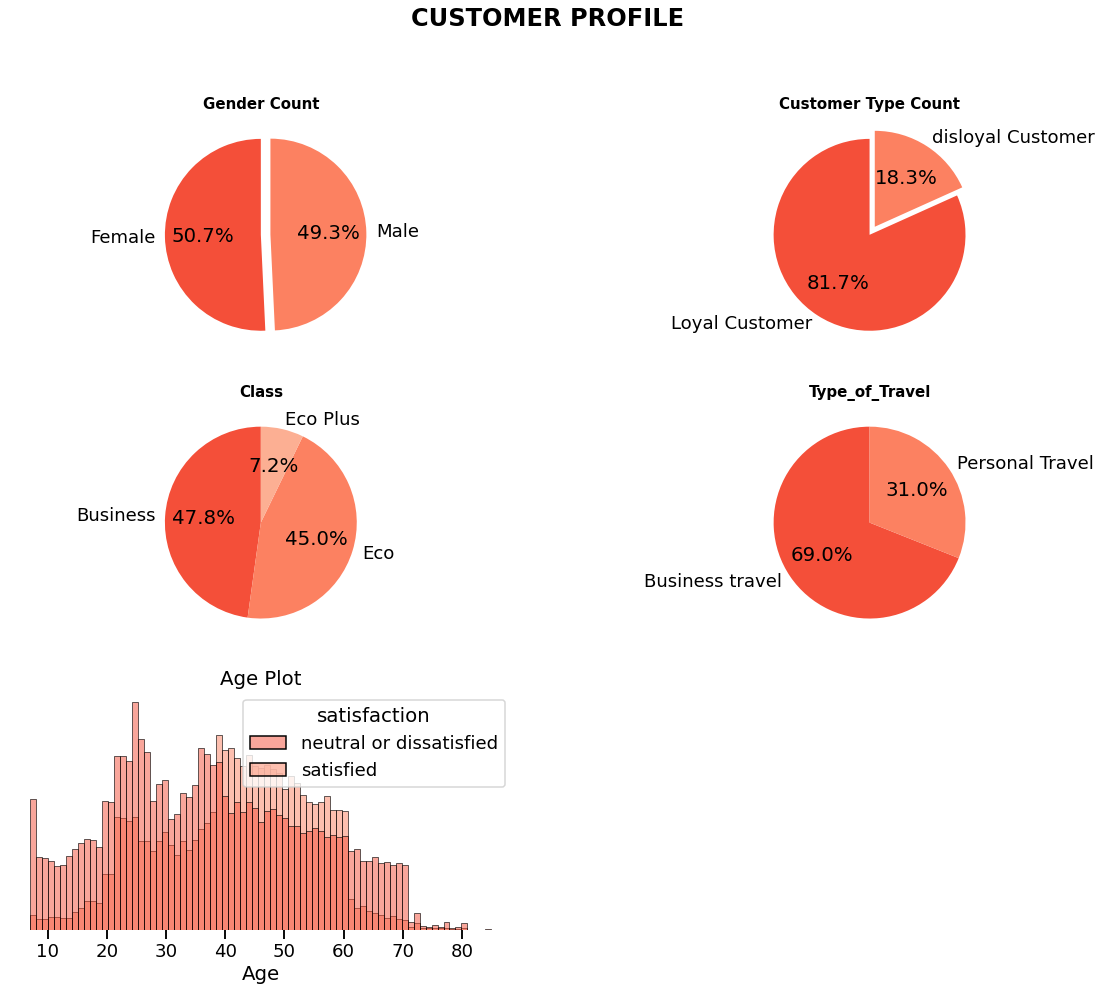

In [ ]:
sns.set_context('talk',font_scale = 1.1)

fig = plt.figure(figsize = (20,15))

plt.suptitle("CUSTOMER PROFILE", weight = 'bold', fontsize = 24)
grid = gridspec.GridSpec(nrows=3,ncols=2, figure = fig)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender Count',weight = 'bold', fontsize = 15)
label = list(df['Gender'].value_counts().index)
value = list(df['Gender'].value_counts().values)
ax1.pie(value,labels = label,autopct = "%1.1f%%", explode = (0,0.1), startangle=90,colors = new_color[2:])
ax1.axis = 'equal'

    
    

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type Count',weight = 'bold', fontsize = 15)
label = list(df['Customer_Type'].value_counts().index)
value = list(df['Customer_Type'].value_counts().values)
ax2.pie(value,labels = label,autopct = "%1.1f%%", explode = (0,0.1), startangle=90,colors = new_color[2:])
ax2.axis = 'equal'

# Pie 
ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Class',fontsize = 15,weight = 'bold')
label = list(df['Class'].value_counts().index)
value = list(df['Class'].value_counts().values)
ax3.pie(value, labels = label, autopct = "%1.1f%%", startangle = 90,colors = new_color[2:])
ax3.axis = 'equal'

## Count plot
# ax3 = fig.add_subplot(grid[1,:1])
# ax3.set_title('Class Count')
# sns.histplot(x = 'Class',data = df, ax = ax3, palette=new_color[:])
# # remove border
# for spine in ax3.spines.values():
#     spine.set_visible(False)
# ax3.get_yaxis().set_visible(False)
# ax3.set_xticklabels(df['Class'].value_counts().index,fontsize = 18)
# for index,value in enumerate(df['Class'].value_counts()):
#     ax3.annotate(value, xy = (index, value+1000), ha = 'center', va = 'center', fontsize = 13)

ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Type_of_Travel',fontsize = 15,weight = 'bold')
label = list(df['Type_of_Travel'].value_counts().index)
value = list(df['Type_of_Travel'].value_counts().values)
ax4.pie(value, labels = label, autopct = "%1.1f%%", startangle = 90,colors = new_color[2:])
ax4.axis = 'equal'

    
# ax4 = fig.add_subplot(grid[1,1:])
# ax4.set_title('Age Graph ')
# sns.kdeplot(x = 'Age',data = df, ax = ax4, color= 'red',fill=True)
# for spine in ax4.spines.values():
#     spine.set_visible(False)
# ax4.get_yaxis().set_visible(True)
# # for index,value in enumerate(df['Age'].value_counts()):
# #     ax4.annotate(value, xy = (index, value + 2000), ha = 'center', va = 'center', fontsize = 13)
# ax4.axvline(df.Age.mean(), linestyle = '--',color = 'red', label = 'Average Age')
# ax4.legend()

ax5 = fig.add_subplot(grid[2,:1])
ax5.set_title('Age Plot')
# sns.kdeplot(x = 'Age',data = df,hue = 'satisfaction',ax = ax5, palette= ['tab:green','tab:orange'])
sns.histplot(x = 'Age',data=df, hue='satisfaction',ax = ax5,palette= new_color[2:4])
# sns.catplot("Age", data=df,ax=ax5, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))

# sns.distplot( x="Age", ax=ax5 ,kind='kde', hue='satisfaction',palette=['tab:green','tab:green'])
for spine in ax5.spines.values():
    spine.set_visible(False)
ax5.get_yaxis().set_visible(False)


plt.show()


###**1) Number of MALES and FEMALES travelling are almost SAME**
###**2) Airplane company has more LOYAL CUSTOMERS and very few DISLOYAL CUSTOMERS ,out of 10 customers 8 are Loyal**
###**3) Business and Economy Classes are most preferred by Customers having 47% and 45% of total booking where as 7 to 8 %  preffer Eco Plus class**
###**4) Most of people prefer to travel in BUSINESS CLASS then ECONOMY CLASS  followed by Very few Percent travel in ECO PLUS CLASS**
###**5) Most of travelling people are in Age group of 20 to 60 with mean of 40 years**
###**6) People at age of 40 to 60 are more Satisfied where as people in age 20 to 40 are less prone to be satisfied beacause of Wifi Services, Food and Cleanliness.**

##**5.5 People Satisfaction Level**

In [ ]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

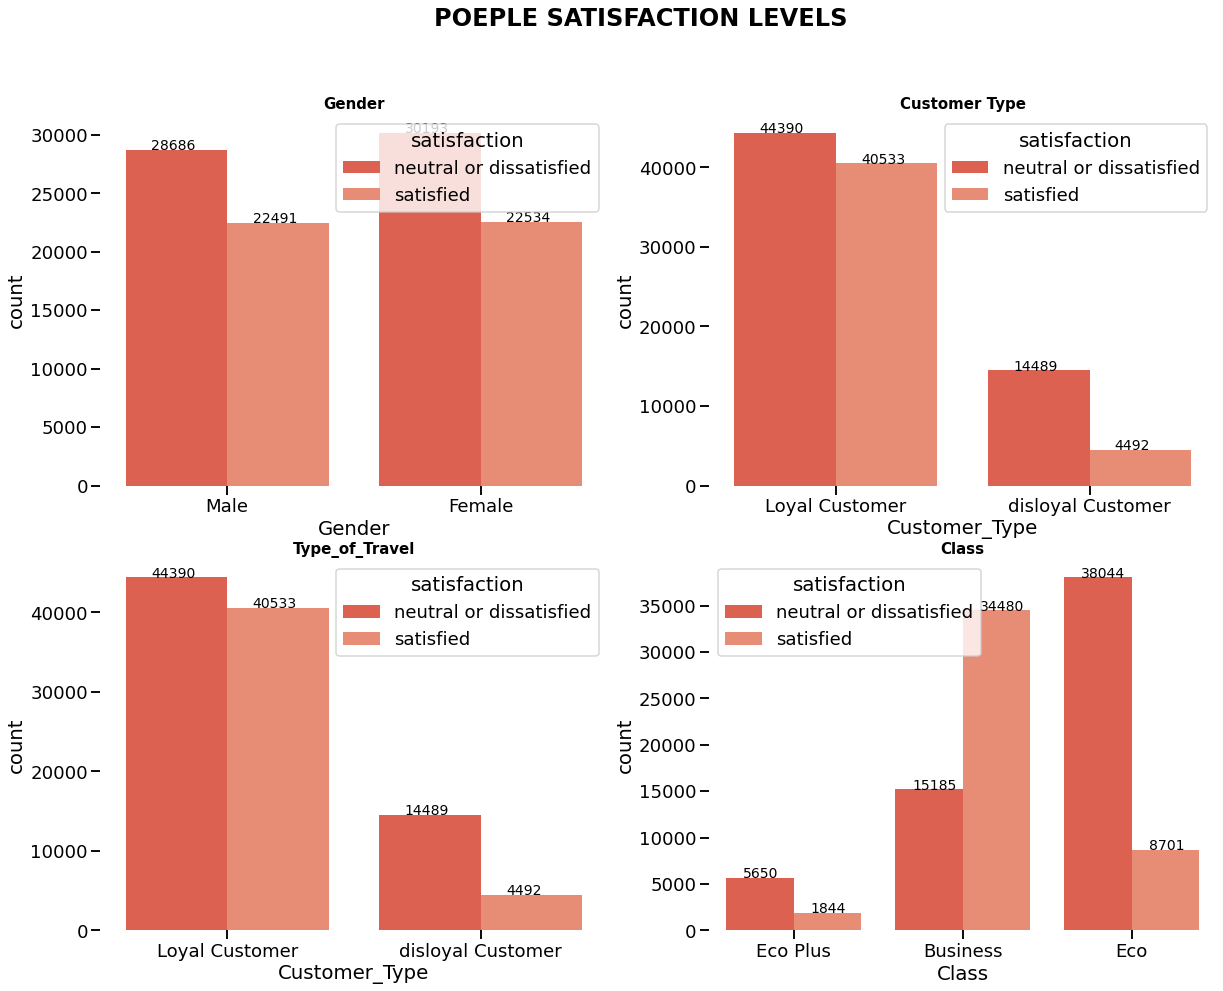

In [ ]:
# People Satisfaction Level

fig = plt.figure(figsize=([20,15]))

plt.suptitle("POEPLE SATISFACTION LEVELS", weight = 'bold', fontsize = 24)
grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)


ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender', fontsize = 15, weight = 'bold')
sns.countplot(x ='Gender', data=df,hue = 'satisfaction',palette=new_color[2:])
for spine in ax1.spines.values():
    spine.set_visible(False)
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    


ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', fontsize = 15, weight = 'bold')
sns.countplot(x ='Customer_Type', data=df,hue = 'satisfaction',palette=new_color[2:])
for spine in ax2.spines.values():
    spine.set_visible(False)
for p in ax2.patches:
    ax2.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    

ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Type_of_Travel', fontsize = 15, weight = 'bold')
sns.countplot(x ='Customer_Type', data=df,hue = 'satisfaction',palette=new_color[2:])
for spine in ax3.spines.values():
    spine.set_visible(False)
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    
ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Class', fontsize = 15, weight = 'bold')
sns.countplot(x ='Class', data=df,hue = 'satisfaction',palette=new_color[2:])
for spine in ax4.spines.values():
    spine.set_visible(False)
for p in ax4.patches:
    ax4.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()), fontsize = 14)
    


plt.show




###**Business Class has Highest Satisfaction Rate where as Eco class has highest rate of Neutral or Unsatisfied**

##**5.6 Ratings Data**

In [ ]:
df.columns[6:20]

Index(['Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness'],
      dtype='object')

In [ ]:
standard_quality_ratings = {5:'Excellent',4:'Very Good',3:'Good',2:'Poor',1:'Very Poor',0:'UnSatisfactory'} # for maping ordinal data

In [ ]:
df['Ease_of_Online_booking'].map(standard_quality_ratings)
percentage = ((df['Ease_of_Online_booking'].value_counts())/(df.shape[0])*100)


###**Comparing Ratings using Barplot**

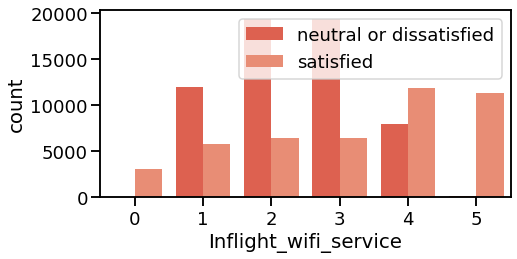

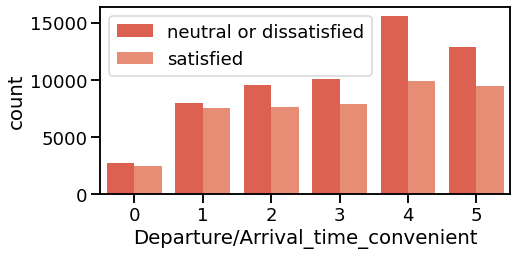

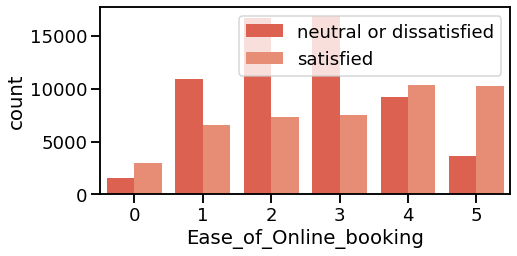

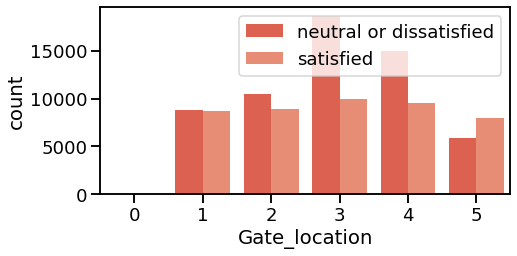

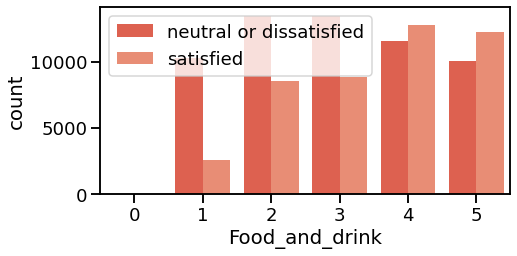

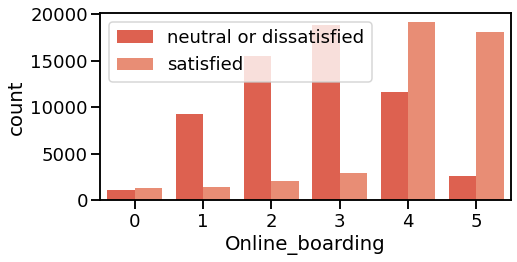

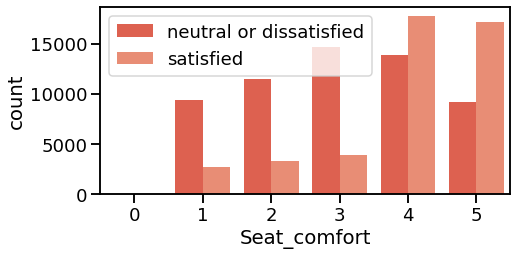

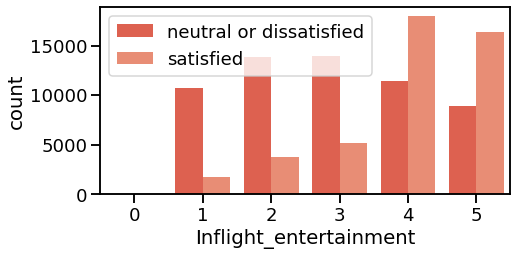

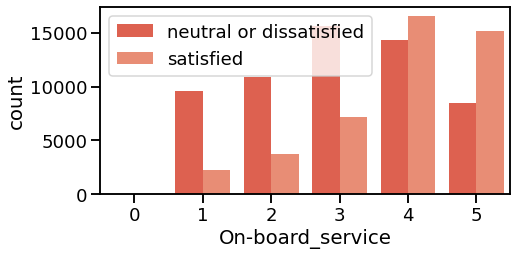

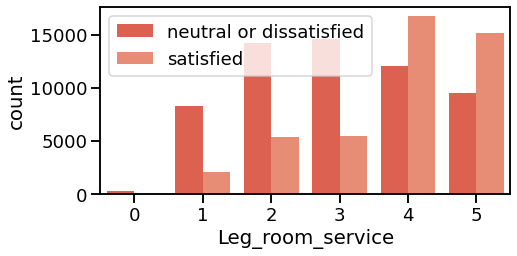

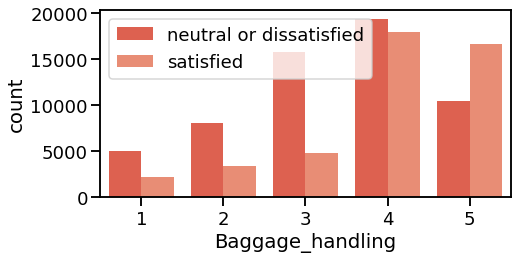

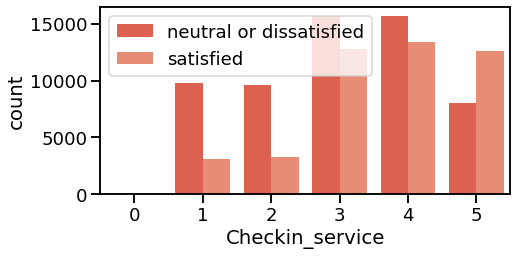

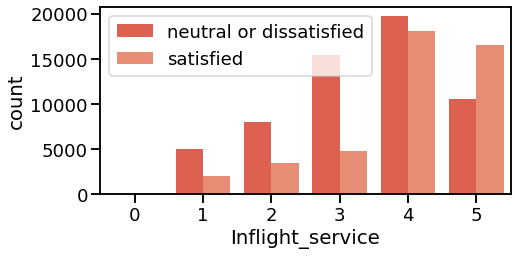

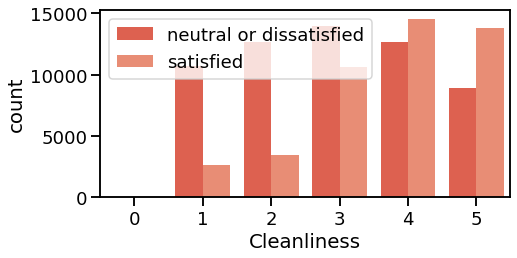

In [ ]:
count = 1
for col in df.columns[6:20]:
    plt.figure(figsize=[25,20])
    plt.subplot(5,3,count)
    sns.countplot(x = col,data = df, hue = 'satisfaction',palette = new_color[2:])
    plt.legend()
    count+=1
    plt.show()

####**We see People are Unsatisfied with Wifi Services and Online Booking services.**

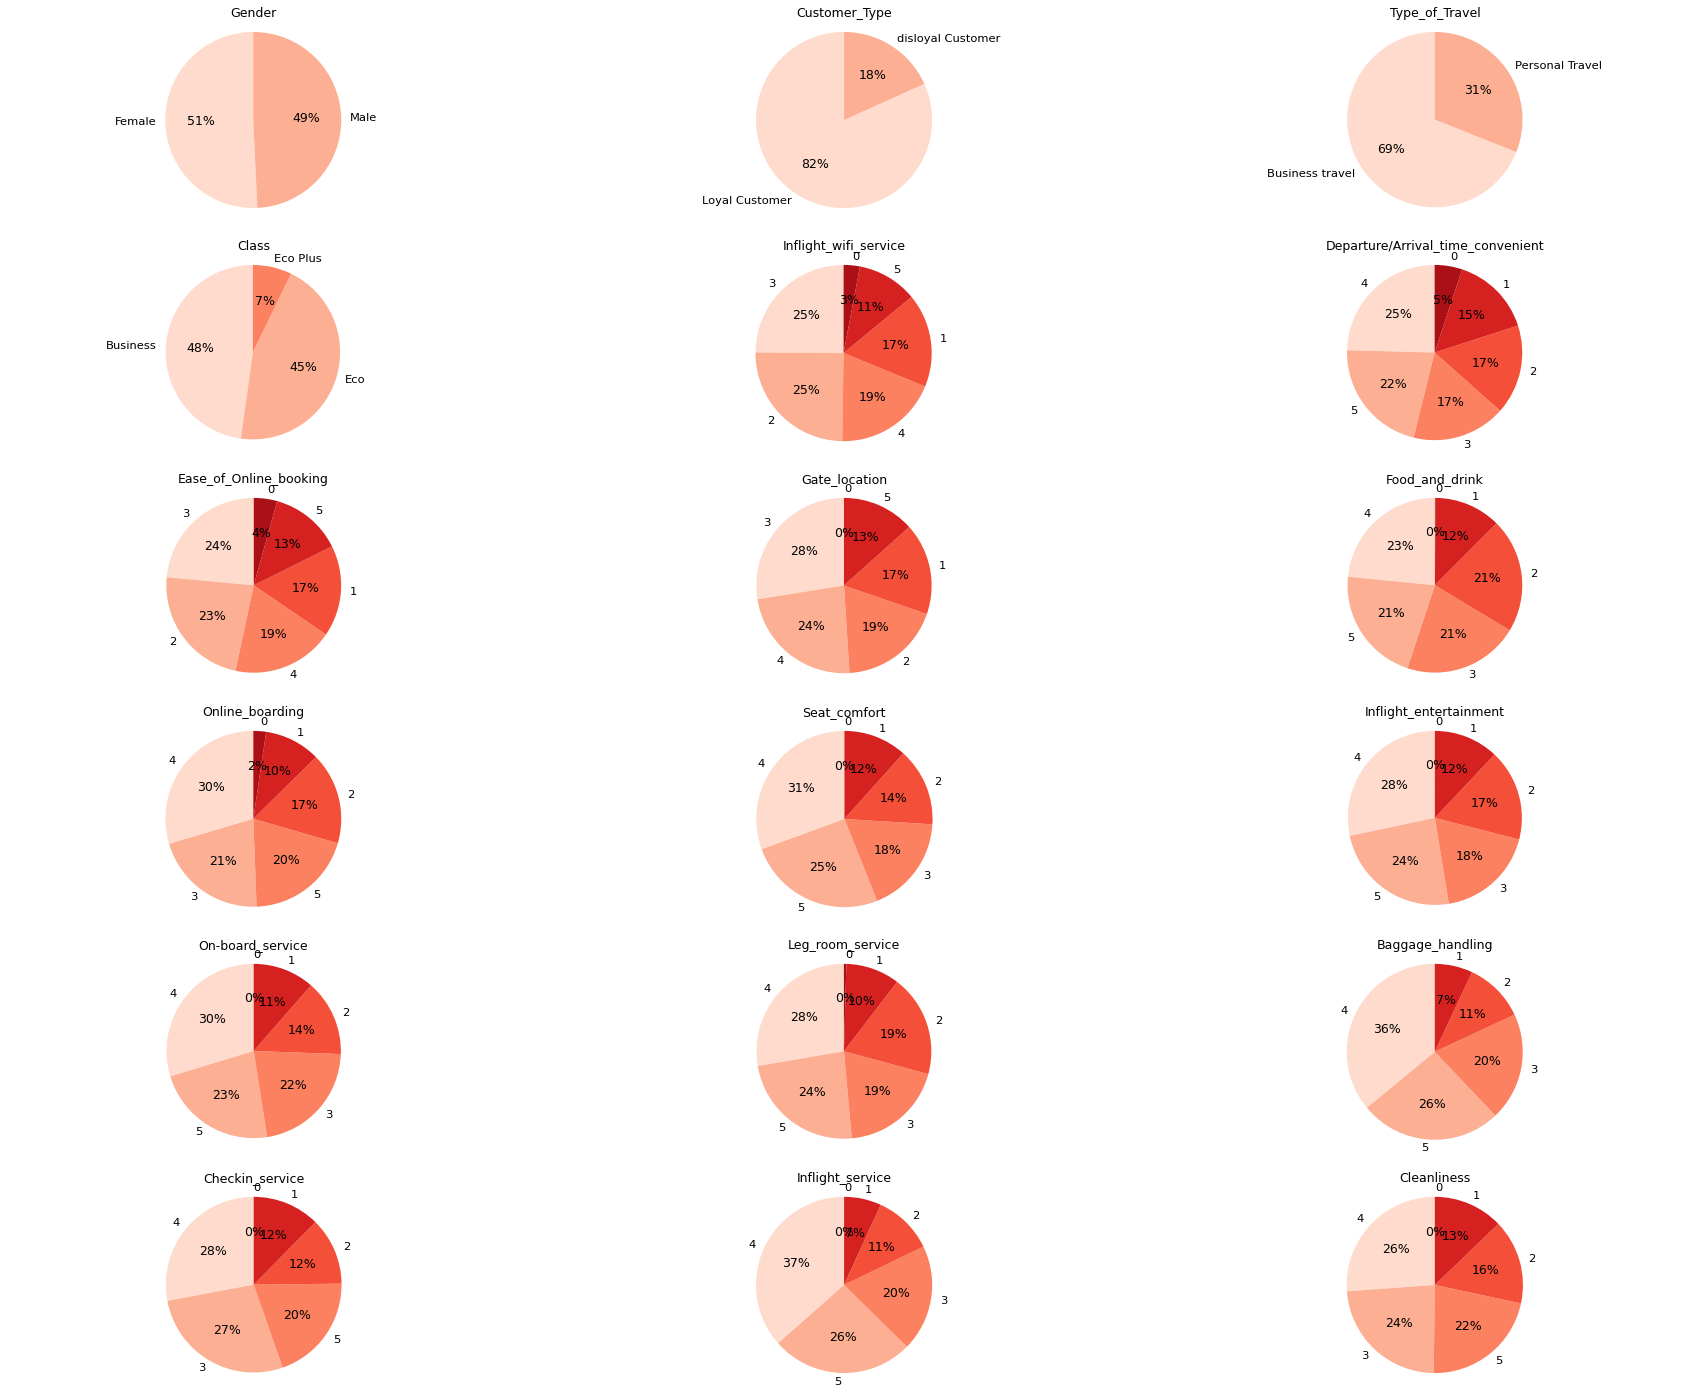

In [ ]:
# Plot the pie charts
data = copy.deepcopy(df)
sns.set_context('talk',font_scale = 1.6)

categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
# I want to take a look at their internal distributions, mainly the percentages they each took from pir charts
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')
sns.set_context('paper',font_scale=1.3)
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (30, 25))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    # Deciding the axes 
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Reds"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

###**Observing the pie charts,More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5). More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5).**

##**5.7 Histogram for AGE**

<Figure size 1440x1440 with 0 Axes>

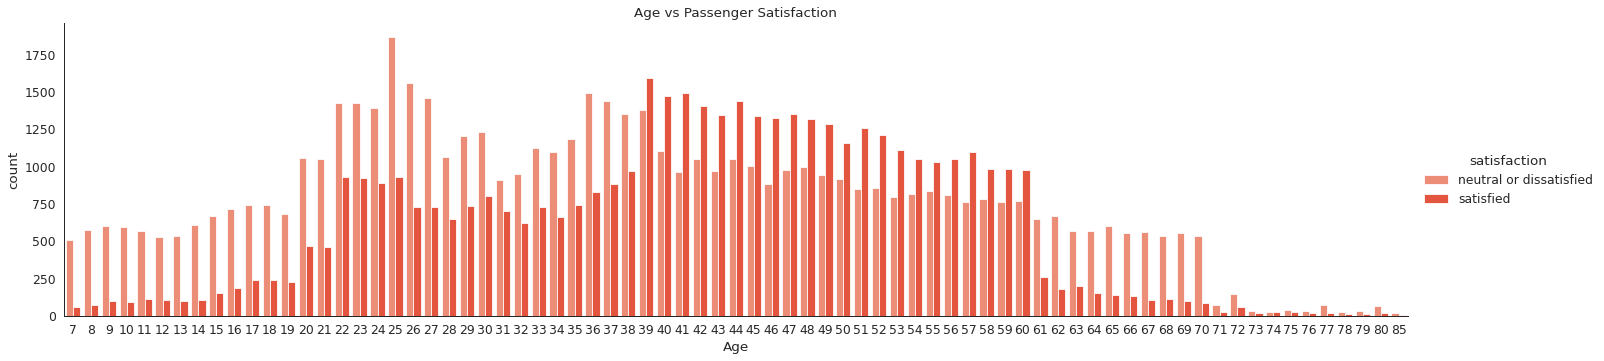

In [ ]:
# Age (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=[20,20])
sns.set_context('paper',font_scale = 1.4)
co = ['#FF8164','#FF4122']
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=4.0,kind='count', hue='satisfaction',palette= co[0:2])
    plt.title('Age vs Passenger Satisfaction')
    plt.show()

### With Mean 39 , 
### From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. on age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

##**5.8 Arrival Delay and Departure Delay Plot**

In [ ]:
air.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

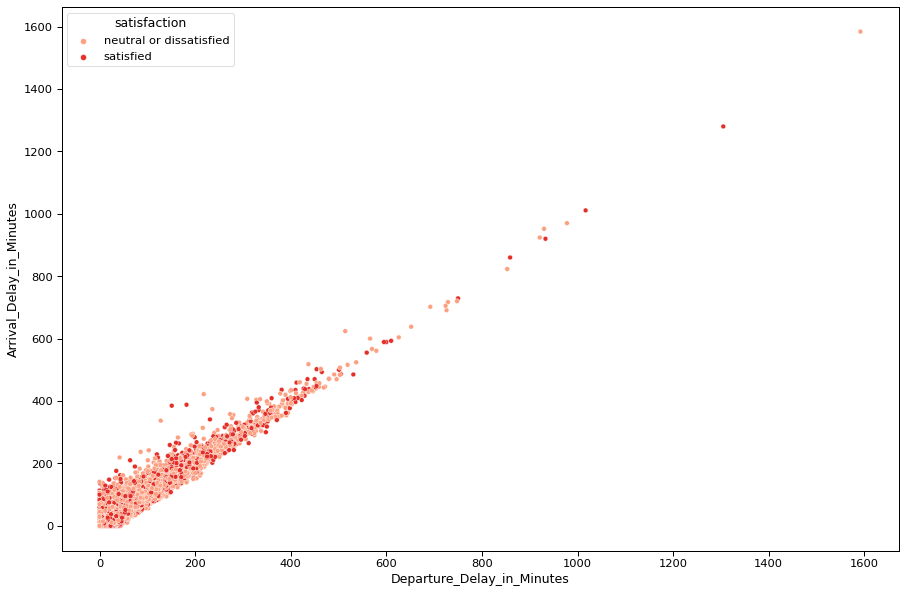

In [ ]:
plt.figure(figsize=[15,10])
sns.set_context('talk',font_scale = 1.8)

sns.set_context('paper', font_scale = 1.3)
sns.scatterplot(x = 'Departure_Delay_in_Minutes', y = 'Arrival_Delay_in_Minutes',hue='satisfaction',palette='Reds', data = air)
plt.show()

###**No matter the Arrival or departure delays the passengers satsifaction wasn't dependent on it**

##**5.9 Violin Plot**

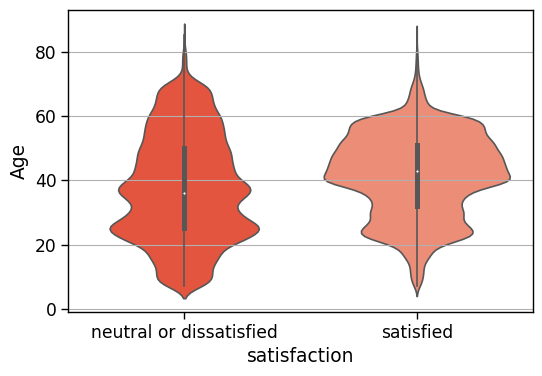

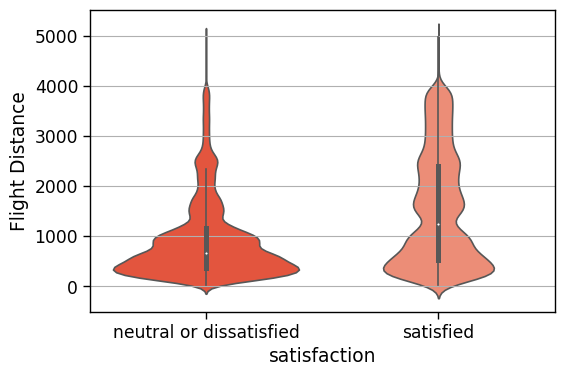

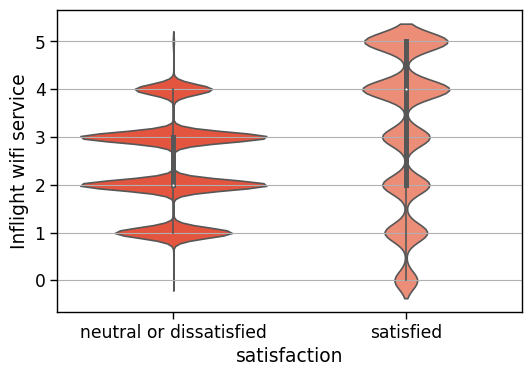

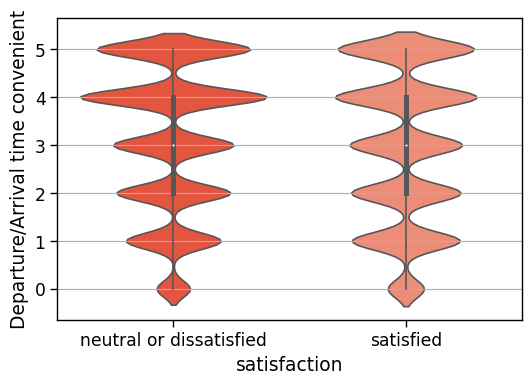

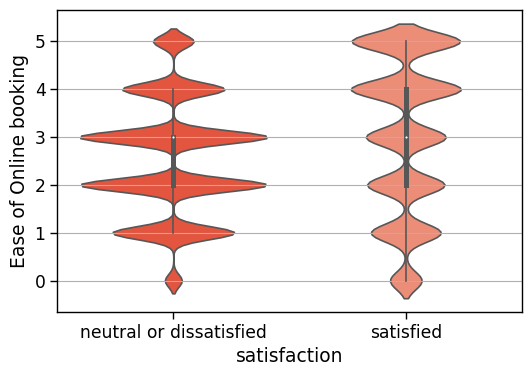

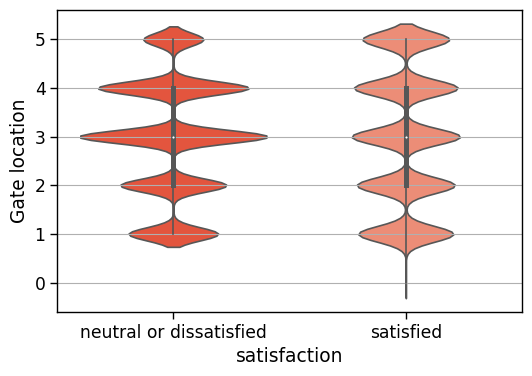

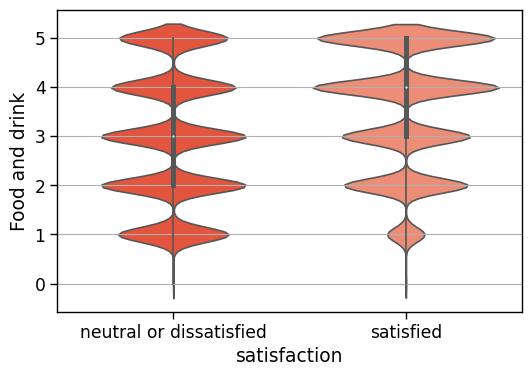

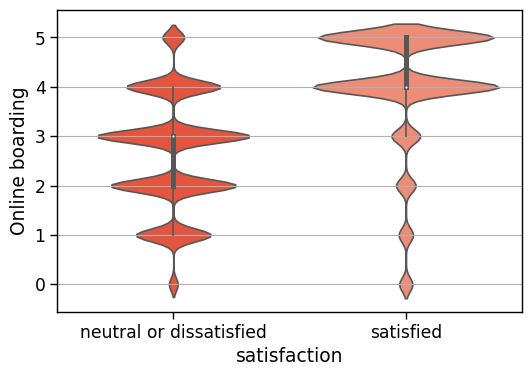

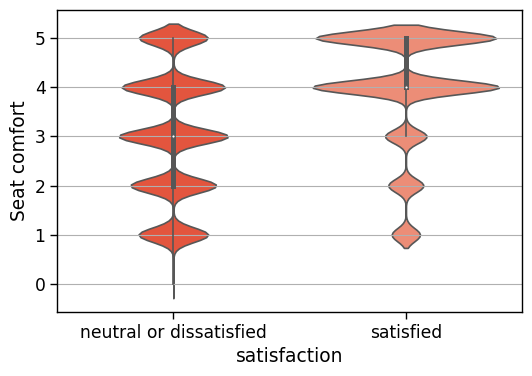

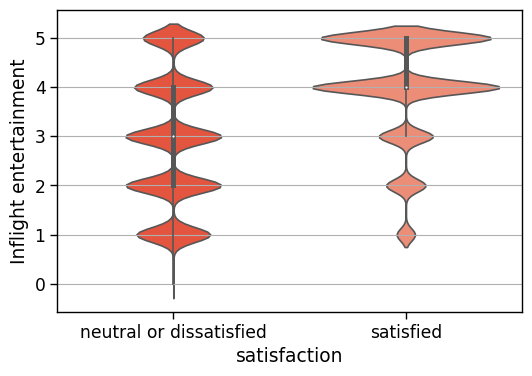

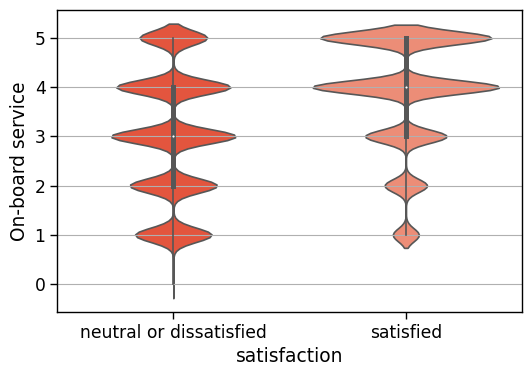

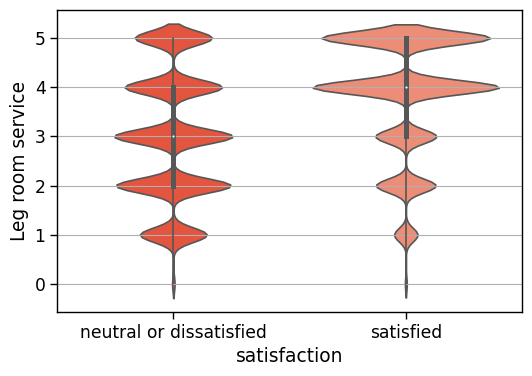

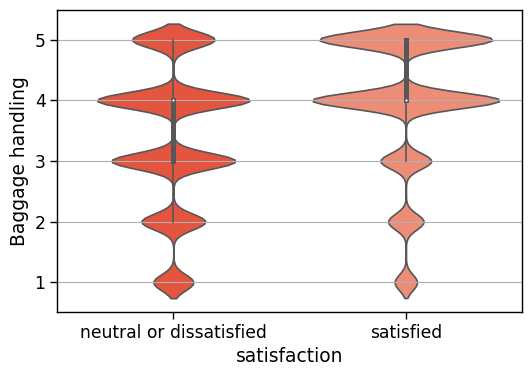

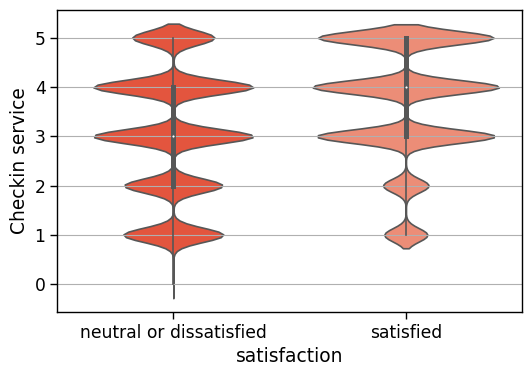

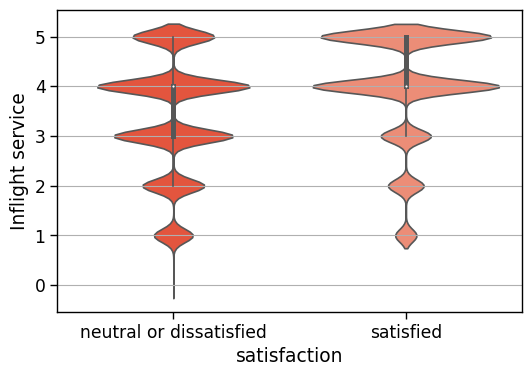

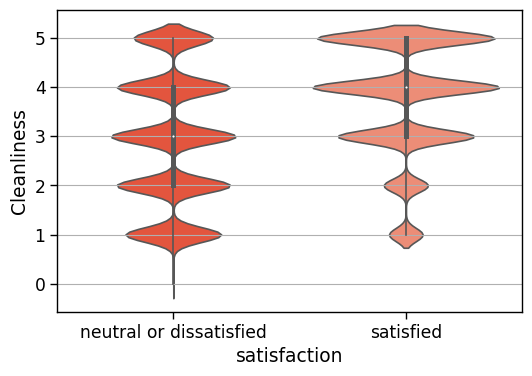

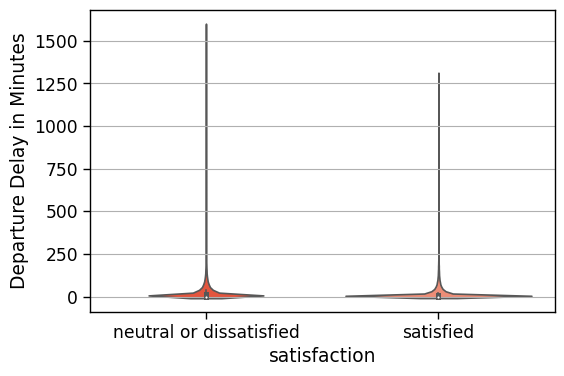

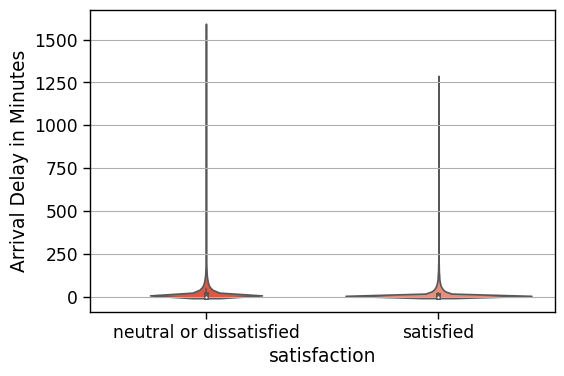

In [ ]:

yName = 'satisfaction'
num = ['Age', 
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
sns.set_context('paper',font_scale = 1.4)
co = ['#ff4122', '#ff8164']
for pred in num:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 100)
    
    ax = sns.violinplot(x=yName, y=pred, data=dataset, palette=co)
    ax.set_xlabel(yName)
    ax.set_ylabel(pred)
    ax.yaxis.grid(True)
    plt.suptitle("")
    plt.title("")
    plt.show()
     
     

####**Age 40 to 60 are More satisfied compared to Others And Long Distance Passenger are more Satisfied**

##**5.10 Flight Distance and Satisfaction**

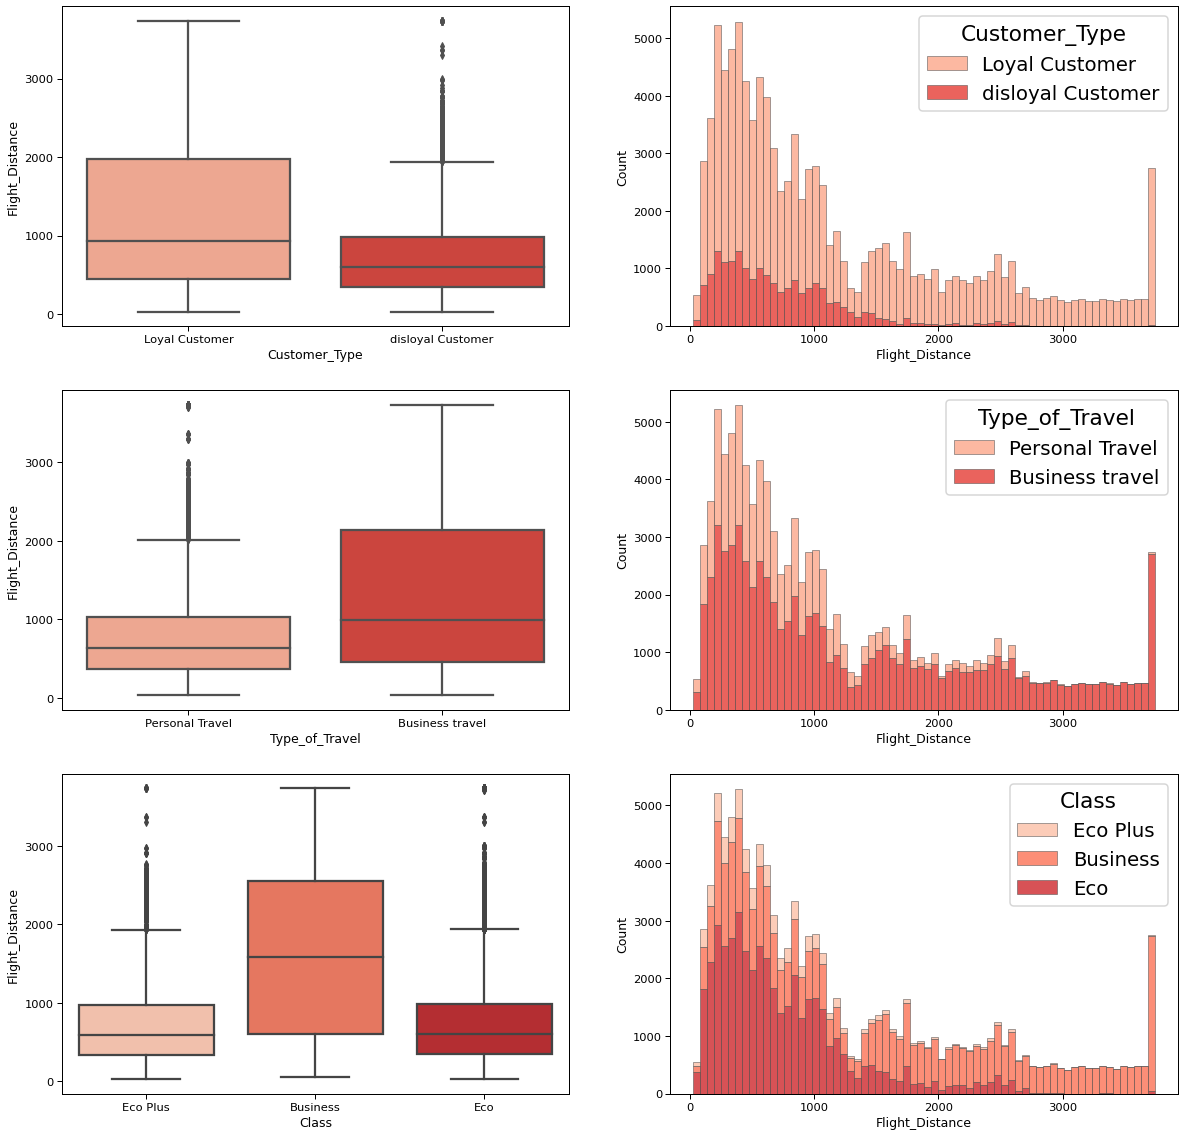

In [ ]:
# How Flight Distance effect the other Classes.
f, ax = plt.subplots(3, 2, figsize = (20,20))
sns.set_context('talk',font_scale = 1.2)

sns.boxplot(x = "Customer_Type", y = "Flight_Distance", palette = "Reds", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight_Distance", hue = "Customer_Type", multiple = "stack", palette = "Reds", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Type_of_Travel", y = "Flight_Distance", palette = "Reds", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight_Distance", hue = "Type_of_Travel", multiple = "stack", palette = "Reds", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
sns.boxplot(x = "Class", y = "Flight_Distance", palette = "Reds", data = df, ax = ax[2, 0])
sns.histplot(df, x = "Flight_Distance", hue = "Class", multiple = "stack", palette = "Reds", edgecolor = ".3", linewidth = .5, ax = ax[2, 1])
     

####**Repeated Customer are More Compared to New Ones, Repeated Customers tend to Travel long Distance, Long Distance Travel is done mostly for Business trips. and Business Class is Prefred for Long Travel**

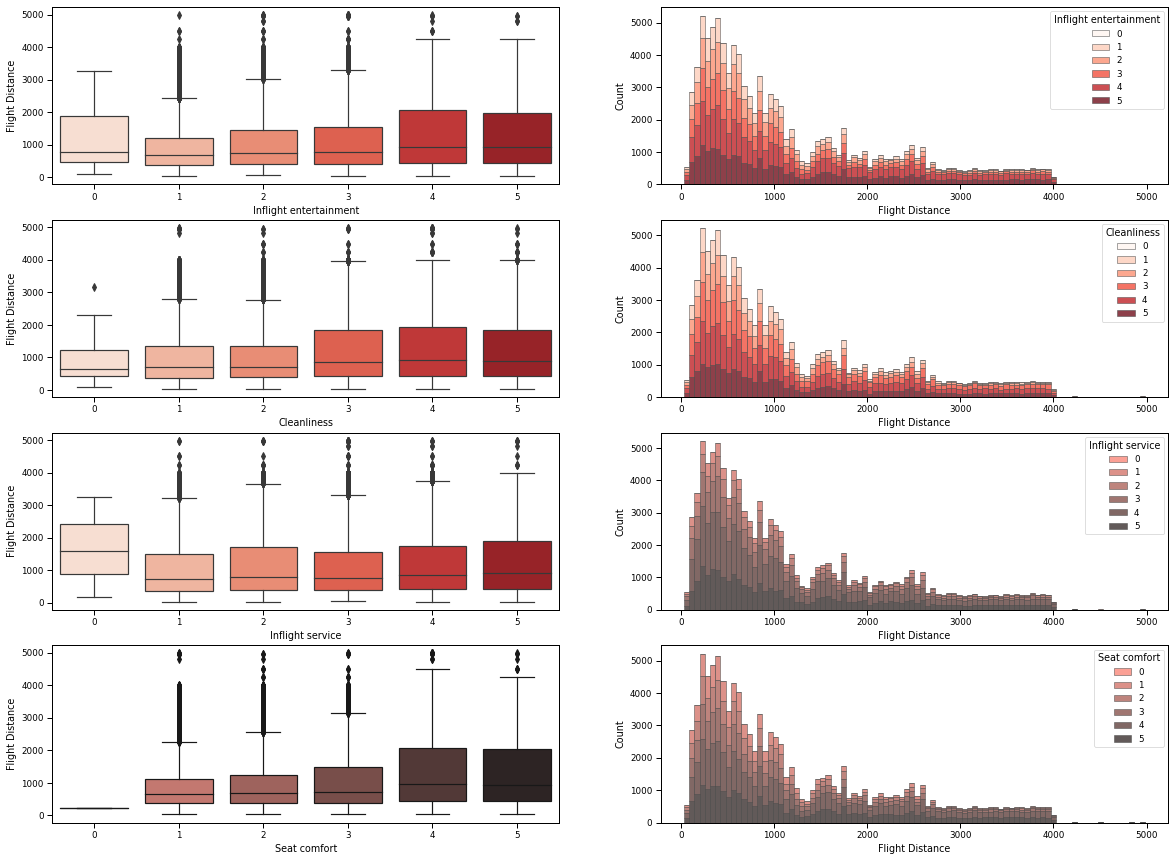

In [102]:
# How flight distance affect Inflight entertainment, Cleanliness ,Inflight service & Seat comfort
f, ax = plt.subplots(4, 2, figsize = (20,15))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "Reds", data = data1, ax = ax[0, 0])
sns.histplot(data1, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "Reds", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Cleanliness", y = "Flight Distance", palette = "Reds", data = data1, ax = ax[1, 0])
sns.histplot(data1, x = "Flight Distance", hue = "Cleanliness", multiple = "stack", palette = "Reds", edgecolor = ".3",linewidth = .5, ax = ax[1, 1])

sns.boxplot(x = "Inflight service", y = "Flight Distance", palette = "Reds", data = data1, ax = ax[2, 0])
sns.histplot(data1, x = "Flight Distance", hue = "Inflight service", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3", linewidth = .5, ax = ax[2, 1])
sns.boxplot(x = "Seat comfort", y = "Flight Distance", palette = "dark:salmon_r", data = data1, ax = ax[3, 0])
sns.histplot(data1, x = "Flight Distance", hue = "Seat comfort", multiple = "stack", palette = "dark:salmon_r", edgecolor = ".3",linewidth = .5, ax = ax[3, 1])

####**Long distance flight passengers gave higher ratings for inflight entertainment,Cleanliness and Seat Comfort. Long distance flight passengers generally travel for business purposes and buy Business Class Ticket**

##**5.11 Clustering**

###**Pairplot**

In [92]:
df5.head()
clust_df = copy.deepcopy(df5)

In [93]:
clust_df['Gender'] = clust_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
clust_df['Is_Loyal_Customer'] = clust_df['Customer_Type'].apply(lambda x:1 if x=='Loyal Customer' else 0)
clust_df = clust_df.drop('Customer_Type', axis = 1)
clust_df['Is_Business_Travel'] = clust_df['Type_of_Travel'].apply(lambda x:1 if x=='Business travel' else 0)
clust_df = clust_df.drop('Type_of_Travel', axis = 1)
clust_df['Class'] = clust_df['Class'].apply(lambda x: 2 if x == 'Business' else 1 if x== 'Eco Plus' else 0)


In [94]:
col_new = ['Gender', 'Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Is_Loyal_Customer', 'Is_Business_Travel','Class', 'satisfaction']

In [95]:
pair_df = clust_df[col_new]

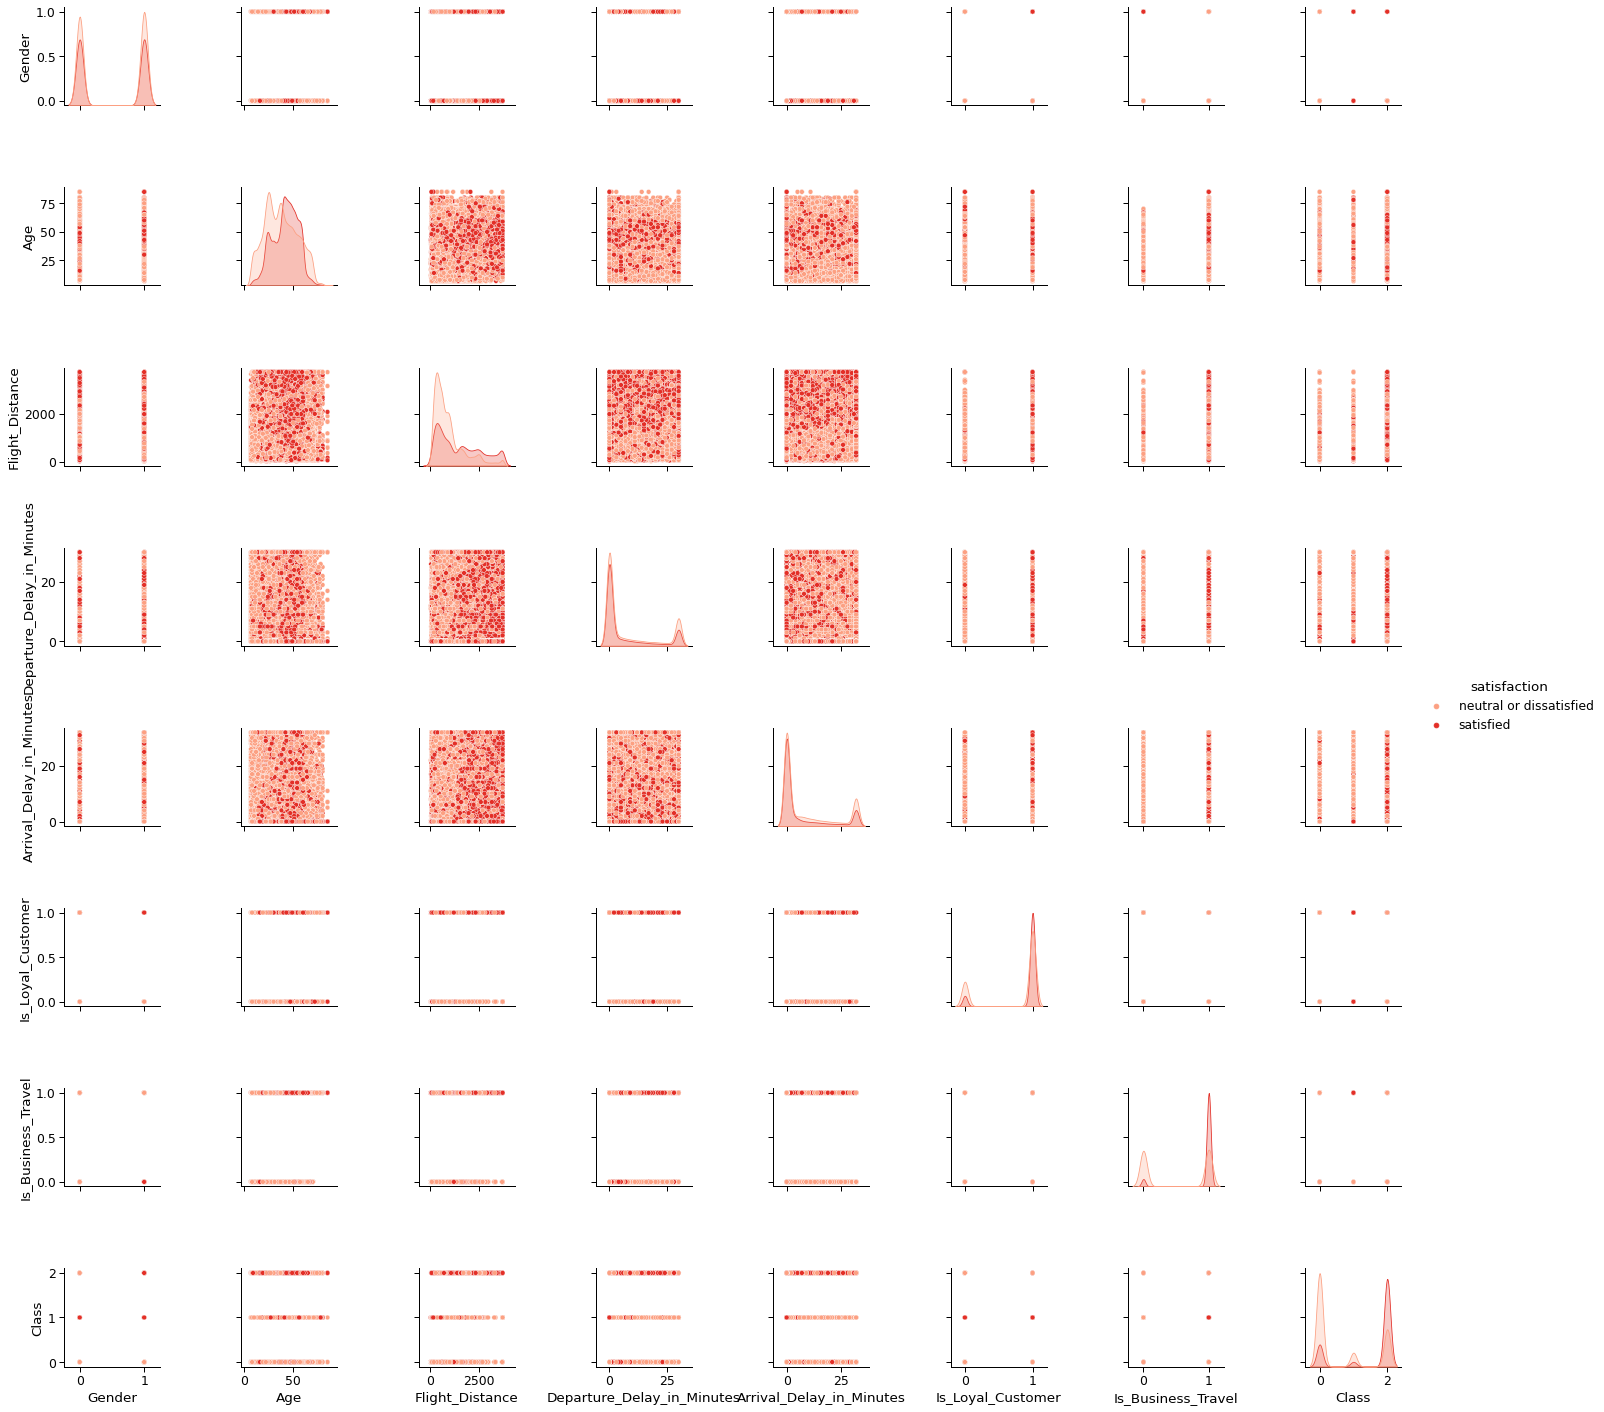

In [ ]:
sns.pairplot(pair_df, hue = 'satisfaction', palette='Reds')

###**Clusters Based on Flight Distance and Arrival Delay.**

In [96]:
clustering_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Inteliment/Air Passenger Satisfaction Project/data.csv")

In [97]:
clustering_dataset.dropna(axis = 0, inplace = True)

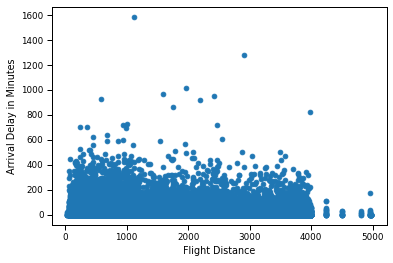

In [98]:
sns.set_context('paper')
plt.scatter(x = 'Flight Distance', y = 'Arrival Delay in Minutes', data = clustering_dataset)
# plt.scatter(x = 'Flight_Distance', y = 'Arrival_Delay_in_Minutes', data = df5)

plt.xlabel("Flight Distance")
plt.ylabel("Arrival Delay in Minutes")
plt.show()

In [99]:
from sklearn.cluster import KMeans  

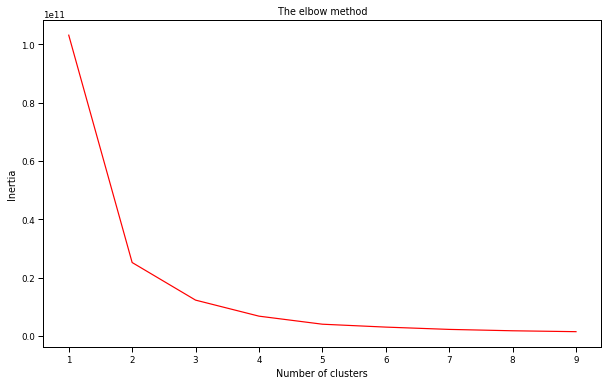

In [100]:
# Elbow Method
dis_arr = clustering_dataset.loc[:, ['Flight Distance', 'Arrival Delay in Minutes']]
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dis_arr)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('The elbow method')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of clusters')
plt.plot(range(1, 10), inertia, color = 'r')
     

#####from elbox method, choosing **3** clusters look appropriate


23113
64542
15939


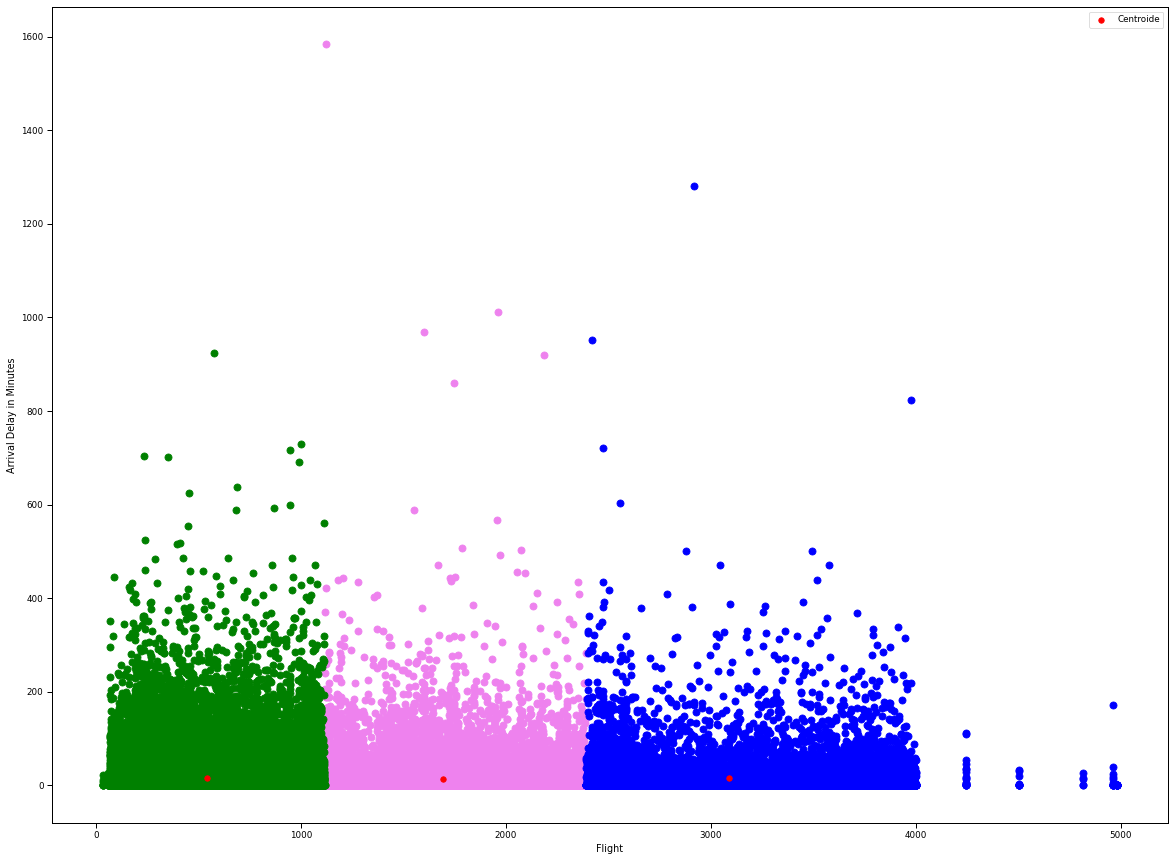

In [101]:
plt.figure(figsize = [20,15])

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, #adjest n_clusters based on the num of clusters selected
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(dis_arr) #predicting and labeling the clusters

print(sum(y_kmeans == 0))
print(sum(y_kmeans == 1))  
print(sum(y_kmeans == 2)) 

plt.scatter(dis_arr.iloc[y_kmeans == 0, 0],dis_arr.iloc[y_kmeans == 0, 1], s = 50,
            c = 'violet')
plt.scatter(dis_arr.iloc[y_kmeans == 1, 0],dis_arr.iloc[y_kmeans == 1, 1], s = 50,
            c = 'green' )
plt.scatter(dis_arr.iloc[y_kmeans == 2, 0],dis_arr.iloc[y_kmeans == 2, 1], s = 50,
            c = 'blue')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s = 30,
            c = 'red', label = 'Centroide')
plt.xlabel('Flight')
plt.ylabel('Arrival Delay in Minutes')
plt.legend()

#It clustering based on flight distance basically, not intuitive



#**6.Taking Cleaned Data for Fitting Models.**

In [ ]:
final_df = copy.deepcopy(df5)
final_df.drop(columns = {'Departure/Arrival_time_convenient','Gate_location','Arrival_Delay_in_Minutes'},inplace = True)

In [ ]:
count = 1
for i in final_df.columns:
    print(count ,':', i)
    count+=1
print()

print(f'Total {final_df.shape[0]} Rows and {final_df.shape[1]} Columns')

1 : Gender
2 : Customer_Type
3 : Age
4 : Type_of_Travel
5 : Class
6 : Flight_Distance
7 : Inflight_wifi_service
8 : Ease_of_Online_booking
9 : Food_and_drink
10 : Online_boarding
11 : Seat_comfort
12 : Inflight_entertainment
13 : On-board_service
14 : Leg_room_service
15 : Baggage_handling
16 : Checkin_service
17 : Inflight_service
18 : Cleanliness
19 : Departure_Delay_in_Minutes
20 : satisfaction

Total 103904 Rows and 20 Columns


#**7.Train Test Splitting**

In [ ]:
final_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


In [ ]:
x = final_df.drop(columns = {'satisfaction'})
y = final_df['satisfaction']

In [ ]:
x.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,25
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,11
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0


In [ ]:
y.head() 

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

##**Encoding Categorical Values**

###**Dependent:**

In [ ]:
y = y.map({'neutral or dissatisfied': 0, 'satisfied' : 1})

###**Independant**

In [ ]:
x= pd.get_dummies(x,columns=['Gender','Class','Customer_Type','Type_of_Travel'],drop_first=False)

In [ ]:
x.head()

,Age,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Gender_Female,Gender_Male,Class_Business,Class_Eco,Class_Eco Plus,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,25,0,1,0,0,1,1,0,0,1
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0,1,1,0,0,0,1,1,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,1,0,1,0,0,1,0,1,0
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,11,1,0,1,0,0,1,0,1,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,1,0,0,1,0,1,0


In [ ]:
x.shape

(103904, 24)

##**MinMax Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # use min-max standardization for numerical features
x[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes']] = scaler.fit_transform(x[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes']])


##**Train Test split data in 80-20 Fashion**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
x.head()

,Age,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Gender_Female,Gender_Male,Class_Business,Class_Eco,Class_Eco Plus,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,0.076923,0.115789,3,3,5,3,5,5,4,3,4,4,5,5,0.833333,0,1,0,0,1,1,0,0,1
1,0.230769,0.055061,3,3,1,3,1,1,1,5,3,1,4,1,0.033333,0,1,1,0,0,0,1,1,0
2,0.243590,0.299865,2,2,5,5,5,5,4,3,4,4,4,5,0.000000,1,0,1,0,0,1,0,1,0
3,0.230769,0.143320,2,5,2,2,2,2,2,5,3,1,4,2,0.366667,1,0,1,0,0,1,0,1,0
4,0.692308,0.049393,3,3,4,5,5,3,3,4,4,3,3,3,0.000000,0,1,1,0,0,1,0,1,0


#**8.Training Models**

##**Selecting Classification Models for Training.**

In [ ]:
Models = [LogisticRegression(max_iter=100), KNeighborsClassifier(),RandomForestClassifier(),XGBClassifier(),GaussianNB(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),LGBMClassifier()]
model_names : str = ['Logistic Regression', 'KNN','Random Forest','XGBoost','Naive Bayes','Decision Tree','ADA Boost','Gradient Boosting','Light GBM']


##**Testing the models for Accuracy , F1 Score and Time Complexitiy**

In [ ]:
# Creating List for Accuracy, F1 Score and Time
final_accuracy = []
final_F1 = []
final_time = []
import time
# Looping Each Model for training
for model in Models:
    classifier = model
    start = time.time()
    
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    
    stop = time.time()
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    # t = stop - start
    print(f"Model : {model} having Accuracy Score : {acc:.2f} and F1 Score : {f1:.2f} with Time : {stop - start:.2f}")
    print('\n')

    final_accuracy.append(round(classifier.score(x_test,y_test) * 100, 2))
    final_F1.append(round(f1_score(y_test,y_pred) * 100, 2))
    final_time.append(round((stop-start),2))

Model : LogisticRegression() having Accuracy Score : 0.88 and F1 Score : 0.86 with Time : 1.26


Model : KNeighborsClassifier() having Accuracy Score : 0.93 and F1 Score : 0.92 with Time : 40.94


Model : RandomForestClassifier() having Accuracy Score : 0.96 and F1 Score : 0.96 with Time : 9.62


Model : XGBClassifier() having Accuracy Score : 0.94 and F1 Score : 0.93 with Time : 6.65


Model : GaussianNB() having Accuracy Score : 0.85 and F1 Score : 0.83 with Time : 0.05


Model : DecisionTreeClassifier() having Accuracy Score : 0.94 and F1 Score : 0.94 with Time : 0.57


Model : AdaBoostClassifier() having Accuracy Score : 0.93 and F1 Score : 0.91 with Time : 3.87


Model : GradientBoostingClassifier() having Accuracy Score : 0.94 and F1 Score : 0.93 with Time : 14.65


Model : LGBMClassifier() having Accuracy Score : 0.96 and F1 Score : 0.96 with Time : 1.93




In [ ]:
data = {'Model Name': model_names,
      'Accuracy': final_accuracy,
      'F1_Score': final_F1,
      'Time': final_time}

score_data = pd.DataFrame(data)

In [ ]:
score_data

,Model Name,Accuracy,F1_Score,Time
0,Logistic Regression,87.64,85.55,1.26
1,KNN,93.46,92.29,40.94
2,Random Forest,96.17,95.53,9.62
3,XGBoost,93.98,92.99,6.65
4,Naive Bayes,84.94,82.55,0.05
5,Decision Tree,94.37,93.56,0.57
6,ADA Boost,92.54,91.36,3.87
7,Gradient Boosting,94.12,93.15,14.65
8,Light GBM,96.23,95.59,1.93


###**LGBM and RandomForest emerges to be the Best models with high Accuracy and F1 Score**

##**Tune Hyper Parameter WRT Random Forest**

###**RandomForest Best Paras**

In [ ]:
n_estimate = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
n_estimate

[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]

In [ ]:
parameters_rf = {
    'n_estimators' : [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
    'max_features' : ['sqrt','auto'],
    "max_depth": [2,4,6],
    "min_samples_leaf": [1,2,3],
    "bootstrap": [True,False]}



gridsearch = GridSearchCV(RandomForestClassifier(), param_grid=parameters_rf, scoring='roc_auc', cv=3, verbose=2, n_jobs=4)
gridsearch.fit(x_train, y_train)
print('best parameters:{0}'.format(gridsearch.best_params_))
print('best AUC score:{0}'.format(gridsearch.best_score_))
print(gridsearch.cv_results_['mean_test_score'])
print(gridsearch.cv_results_['params'])

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
best parameters:{'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 64}
best AUC score:0.9789951518888236
[0.9302593  0.93085412 0.9361667  0.93393265 0.93677585 0.94077783
 0.93938768 0.93905861 0.9370986  0.94210114 0.93256692 0.92158261
 0.9357064  0.93876013 0.93628447 0.93922102 0.93962364 0.93856385
 0.94025802 0.93669987 0.93268735 0.9326862  0.93666734 0.93835384
 0.93786577 0.93692515 0.93944146 0.93974834 0.93765031 0.94148955
 0.92892422 0.92928525 0.93422892 0.93674348 0.93864083 0.93827872
 0.9363638  0.94129221 0.93901415 0.93742394 0.9251325  0.92913691
 0.92872975 0.9378607  0.94063963 0.93391485 0.93829866 0.93606203
 0.93709167 0.93296221 0.92594129 0.93246502 0.93007729 0.93226153
 0.9377895  0.93723206 0.93933992 0.93795959 0.93455304 0.93759246
 0.96135866 0.96392003 0.9648349  0.96498553 0.96518987 0.96465364
 0.96517248 0.96604188 0.96681274 0.96590747 0

###**Teting RandomForest Best Paras**

In [ ]:

# Random Forest model with Best Parameters
model = RandomForestClassifier(bootstrap=True, max_depth = 6, max_features='sqrt', min_samples_leaf=1, n_estimators=33)
model.fit(x_train,y_train)
y_pred_rf = model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(f1_score(y_test,y_pred_rf, ))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11713
           1       0.93      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

0.9295991530725182
0.9186725220968369


##**Tune Hyper Parameter WRT LGBM**


###**LightGBM Best Paras**

In [ ]:

parameters = {
    'max_depth': [4,6,8,10],
    'num_leaves': [20,30,40,50],
    'min_child_samples': [16,18,20,22],
    'min_child_weight':[0.001,0.002]
}

gridsearch = GridSearchCV(LGBMClassifier(), param_grid=parameters, scoring='roc_auc', cv=3)
gridsearch.fit(x_train, y_train)
print('best parameters:{0}'.format(gridsearch.best_params_))
print('best AUC score:{0}'.format(gridsearch.best_score_))
print(gridsearch.cv_results_['mean_test_score'])
print(gridsearch.cv_results_['params'])

best parameters:{'max_depth': 10, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves': 50}
best AUC score:0.9944525728399706
[0.99048518 0.99048518 0.99048518 0.99048518 0.99048518 0.99048518
 0.99048518 0.99048518 0.99045795 0.99045795 0.99045795 0.99045795
 0.99045795 0.99045795 0.99045795 0.99045795 0.99051138 0.99051138
 0.99051138 0.99051138 0.99051138 0.99051138 0.99051138 0.99051138
 0.99051854 0.99051854 0.99051854 0.99051854 0.99051854 0.99051854
 0.99051854 0.99051854 0.99283597 0.99322463 0.99323306 0.99323209
 0.99283597 0.99322463 0.99323306 0.99323209 0.99283494 0.99317771
 0.99324631 0.99334004 0.99283494 0.99317771 0.99324631 0.99334004
 0.99291284 0.99320976 0.99332172 0.99326825 0.99291284 0.99320976
 0.99332172 0.99326825 0.99288386 0.99326251 0.99330185 0.99331161
 0.99288386 0.99326251 0.99330185 0.99331161 0.99341228 0.9939815
 0.99414959 0.99418675 0.99341228 0.9939815  0.99414959 0.99418675
 0.9934475  0.99391649 0.99415893 0.99413289 0.9934475  0.9

###**Testing LightGBM Best Paras**

In [ ]:
# parameters:{'max_depth': 10, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves': 50}

# LGBM model with Best Parameters
model = LGBMClassifier(max_depth=10, min_child_samples=16, min_child_weight=0.001, num_leaves=50)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.98      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Accuracy Score :  0.9630912853086955
F1 Score :  0.9568980050576004


In [ ]:
from sklearn import metrics
mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matix : \n",mat)

Confusion Matix : 
 [[11500   213]
 [  554  8514]]


##**Confusion Matrix**

Text(0.5, 257.44, 'Predicted label')

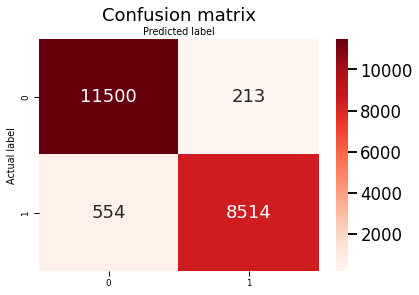

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.set_context('talk', font_scale = 1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

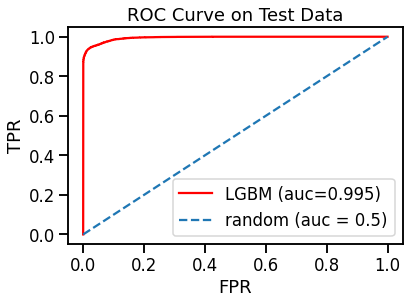

In [ ]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba),3)
plt.plot(fpr,tpr,label="LGBM (auc="+str(auc)+')', color='red')
plt.plot([0, 1], [0, 1], label='random (auc = 0.5)', linestyle='--')
plt.title('ROC Curve on Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

#**9.Feature Importance**

##**Wrapper Method for Important Features**

In [ ]:
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(x, y)
support = selector.get_support()
features = x.loc[:,support].columns.tolist()
count = 1
print("Important Features")
for i in features:
    print(count,'->',i)
    count+=1

Important Features
1 -> Inflight_wifi_service
2 -> Ease_of_Online_booking
3 -> Online_boarding
4 -> Seat_comfort
5 -> Inflight_entertainment
6 -> Class_Business
7 -> Class_Eco
8 -> Type_of_Travel_Business travel
9 -> Type_of_Travel_Personal Travel


##**Permuatation Importance**

In [ ]:
import eli5
from sklearn.ensemble import RandomForestClassifier as rf
from lightgbm import LGBMClassifier
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(x,y),random_state=1).fit(x,y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.1442 ± 0.0011,Inflight_wifi_service
0.0462 ± 0.0007,Online_boarding
0.0380 ± 0.0008,Baggage_handling
0.0378 ± 0.0008,Checkin_service
0.0356 ± 0.0004,Inflight_service
0.0354 ± 0.0010,Seat_comfort
0.0317 ± 0.0005,Type_of_Travel_Business travel
0.0252 ± 0.0008,Cleanliness
0.0164 ± 0.0003,Age
0.0159 ± 0.0004,On-board_service


##**Model's Feature Importance**

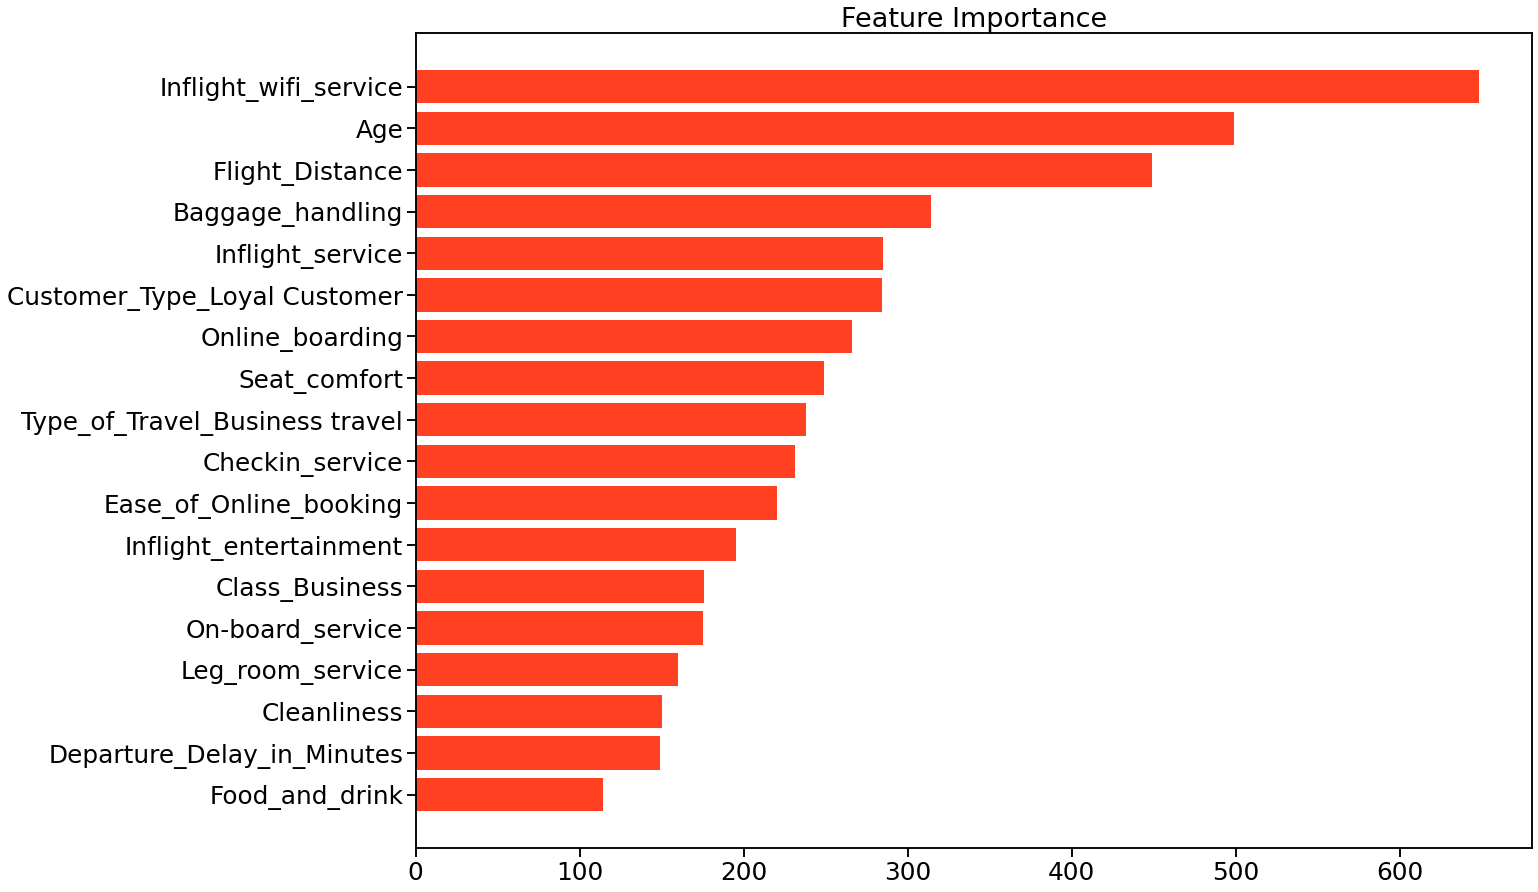

In [ ]:
importances_values = model.feature_importances_
importances = pd.DataFrame(importances_values, columns=['importance'])
feature_data = pd.DataFrame(x_train.columns, columns=['feature'])
importance = pd.concat([feature_data, importances], axis=1)
importance = importance.sort_values(['importance'], ascending=True)
importance.set_index('feature', inplace=True)
importance = importance.reset_index()

plt.figure(figsize=(20, 15))
plt.barh(importance['feature'].tail(18), importance['importance'].tail(18), color='#ff4122')
plt.title('Feature Importance')
plt.show()

**From Permutation and Model Importance we Conclude the Important features affection customer or passenger satisfaction.**

###**List of Important Features:**
1.   Inflight WIFI Services
2.   Online Boarding
3.   Seat_comfort
4.   Checkin_service
5.   Online Booking
6.   Checkin Services
7.   Inflight Entertainment
8.   On Board Servcices
9.   Cleanliness
10.  Inflight Services









##**Interpretation on the top features**

In [ ]:
cat_df = copy.deepcopy(clustering_dataset)

In [ ]:
pd.options.display.float_format='{:,.2f}'.format 

In [ ]:
cat_df['satisfaction'] = cat_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied' : 1})

In [ ]:

# Handling the data for further analysis
cat_df['Arrival Delay in Minutes'] = cat_df['Arrival Delay in Minutes'].fillna(0)
cat_df['Gender'] = cat_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 
cat_df['Is_Loyal_Customer'] = cat_df['Customer Type'].apply(lambda x:1 if x=='Loyal Customer' else 0)
cat_df = cat_df.drop('Customer Type', axis = 1)
cat_df['Is_Business_Travel'] = cat_df['Type of Travel'].apply(lambda x:1 if x=='Business travel' else 0)
cat_df = cat_df.drop('Type of Travel', axis = 1)
cat_df['Class'] = cat_df['Class'].apply(lambda x: 2 if x == 'Business' else 1 if x== 'Eco Plus' else 0)


In [ ]:
cat_df.head()

,Unnamed: 0,id,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Is_Loyal_Customer,Is_Business_Travel
0,0,70172,0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,0,1,0
1,1,5047,0,25,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,0,0,1
2,2,110028,1,26,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,1,1,1
3,3,24026,1,25,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,0,1,1
4,4,119299,0,61,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,1,1,1


In [ ]:
# Business Travel VS Class

def calculate_group(Is_Business_Travel, Class): 
    if Is_Business_Travel == 1 and Class == 2: 
        group = 5 
    elif Is_Business_Travel == 1 and Class == 1: 
        group = 4 
    elif Is_Business_Travel == 1 and Class == 0: 
        group = 3 
    elif Is_Business_Travel == 0 and Class == 2: 
        group = 2 
    elif Is_Business_Travel == 0 and Class == 1: 
        group = 1
    elif Is_Business_Travel == 0 and Class == 0: 
        group = 0
    return group
     

In [ ]:
cat_df['BTravel_Class_Label'] = cat_df.apply(lambda x : calculate_group(x["Is_Business_Travel"], x["Class"]), axis=1)
cat_df.groupby('BTravel_Class_Label')['satisfaction'].mean()
     

BTravel_Class_Label
0   0.10
1   0.09
2   0.12
3   0.30
4   0.39
5   0.72
Name: satisfaction, dtype: float64

#### Non Business travellers are not Satisfied compared to the Business travellers.

In [ ]:
# Class VS Loyalty
def calculate_group1(Is_Loyal_Customer, Class): 
    if Is_Loyal_Customer == 1 and Class == 2: 
        group = 5 
    elif Is_Loyal_Customer == 0 and Class == 2: 
        group = 4 
    elif Is_Loyal_Customer == 1 and Class == 1: 
        group = 3 
    elif Is_Loyal_Customer == 0 and Class == 1: 
        group = 2 
    elif Is_Loyal_Customer == 1 and Class == 0:
        group = 1
    elif Is_Loyal_Customer == 0 and Class == 0: 
        group = 0
    return group

In [ ]:
cat_df['Loyal_Class_Label'] = cat_df.apply(lambda x : calculate_group1(x["Is_Loyal_Customer"], x["Class"]), axis=1)
cat_df.groupby('Loyal_Class_Label')['satisfaction'].mean()

Loyal_Class_Label
0   0.14
1   0.20
2   0.08
3   0.26
4   0.40
5   0.75
Name: satisfaction, dtype: float64

####Loyal customers, despite in low class, would always have higher satisfaction.but in not loyal customers, people who book Eco Plus would have lower satisfaction compared to those booked Eco. This can be caused by the fact that these people care more about experiences, but the actual experience is below expectations.

In [ ]:
# Travel VS Loyalty


def calculate_group2(Is_Business_Travel, Is_Loyal_Customer): 
    if Is_Business_Travel == 1 and Is_Loyal_Customer == 1: 
        group = 3 
    elif Is_Business_Travel == 1 and Is_Loyal_Customer == 0: 
        group = 2 
    elif Is_Business_Travel == 0 and Is_Loyal_Customer == 1: 
        group = 1 
    elif Is_Business_Travel == 0 and Is_Loyal_Customer == 0: 
        group = 0 
    return group

In [ ]:

cat_df['BTravel_Loyal_Label'] = cat_df.apply(lambda x : calculate_group2(x["Is_Business_Travel"], x["Is_Loyal_Customer"]), axis=1)
cat_df.groupby('BTravel_Loyal_Label')['satisfaction'].mean()

BTravel_Loyal_Label
0   0.15
1   0.10
2   0.24
3   0.71
Name: satisfaction, dtype: float64

####passengers who are loyal and not going for business trip are having the lowest satisfaction.Even lower than non-loyal passengers go for non-business trip 

In [ ]:
top5 = ['Inflight wifi service', 'Baggage handling', 'Online boarding', 'Inflight service', 'Seat comfort', 'satisfaction']

In [ ]:

#Class and BTravel
cat_df.groupby('BTravel_Class_Label')[top5].mean()

,Inflight wifi service,Baggage handling,Online boarding,Inflight service,Seat comfort,satisfaction
BTravel_Class_Label,,,,,,
0,2.52,3.60,2.77,3.62,3.17,0.10
1,2.50,3.57,2.76,3.62,3.22,0.09
2,2.55,3.34,3.24,3.33,3.46,0.12
3,2.88,3.26,2.87,3.26,3.10,0.30
4,3.01,3.17,3.01,3.17,3.16,0.39
5,2.79,3.87,3.74,3.87,3.77,0.72


In [ ]:

#Class and Loyal
cat_df.groupby('Loyal_Class_Label')[top5].mean()

,Inflight wifi service,Baggage handling,Online boarding,Inflight service,Seat comfort,satisfaction
Loyal_Class_Label,,,,,,
0,2.58,3.37,2.59,3.38,3.00,0.14
1,2.71,3.47,2.88,3.49,3.18,0.20
2,2.46,3.14,2.47,3.15,3.02,0.08
3,2.80,3.39,2.93,3.41,3.20,0.26
4,2.93,4.22,2.91,4.22,2.99,0.40
5,2.75,3.78,3.86,3.78,3.90,0.75


In [ ]:

#BTravel and Loyal
cat_df.groupby('BTravel_Loyal_Label')[top5].mean()

,Inflight wifi service,Baggage handling,Online boarding,Inflight service,Seat comfort,satisfaction
BTravel_Loyal_Label,,,,,,
0,2.61,3.72,2.47,3.77,2.98,0.15
1,2.52,3.58,2.80,3.60,3.20,0.10
2,2.71,3.69,2.71,3.70,2.99,0.24
3,2.86,3.64,3.72,3.64,3.75,0.71


#**10.Conclusions:**



###**ML Algorithms gives good results while considering an Air Passenger Datasets. Light GBM, Random Forest and Decision Tree Models have performed better compared to all other algorithms. Considering the F1 Score and Time we choose LightGradientBoosting as the Best algorithm for Classification.**


###**So we have a precise classification model for airlines to identify critical factors to raise passenger satisfaction. From some of the simulations,I recommend that airlines should focus on improving the Inflight Wi-Fi Service experience. Airlines could develop better software to allow easier access to inflight wi-fi, or lower the cost to access inflight wi-fi such that more economy class customers can enjoy the service. In addition, airlines should also focus on Ease of Online Booking, as business passengers prioritize on ease and convenience in their travel**

###**1.We have a precise Classification model for Airline Company to identify the critical factors to raise passengers satisfaction.**

###**2.We Concluded the most Important features that play Crucial task in Passenger Satisfaction.**

###**3.We Recommended the Components that needed to be Upgraded for  better Customer Satisfaction of the Company.**